## Connect to Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK Stopwords 需要先下載
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# 讀取 CSV 檔案
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/Data Preprocessing/Original CSV/filtered_embedding_2023.csv')

# 函數：清洗文本
def clean_text(text):
    # 轉換為小寫
    text = text.lower()
    # 移除特殊字符和數字
    text = re.sub(r'\W+', ' ', text)
    # 移除單個字符
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # 移除開頭是單個字符的文本
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # 移除多餘的空格
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # 移除前導空格
    text = text.strip()
    # 移除停用詞
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    text = ' '.join(filtered_text)
    return text

# 清洗 Title 和 Content 列
df['title'] = df['title'].apply(clean_text)
df['content'] = df['content'].apply(clean_text)

# 保存清洗後的數據
df.to_csv('/content/drive/MyDrive/Thesis Dataset/Data Preprocessing/Finished CSV/Data Preprocessing_2023.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Invalid data

In [ ]:
import pandas as pd

# 初始化一個列表來儲存那些無法用 UTF-8 解碼的行
invalid_utf8_rows = []

# 打開文件，逐行讀取並檢查編碼問題
with open('/content/drive/MyDrive/Thesis Dataset/Data Preprocessing/Original CSV/filtered_embedding_2019.csv', 'rb') as file:
    lines = file.readlines()

for i, line in enumerate(lines):
    try:
        # 嘗試用 UTF-8 解碼每一行
        line.decode('utf-8')
    except UnicodeDecodeError:
        # 如果存在編碼錯誤，將行索引和內容添加到列表中
        invalid_utf8_rows.append((i, line.decode('utf-8', errors='replace')))

# 將結果轉換為 DataFrame 以便更好地處理並保存到 CSV
invalid_rows_df = pd.DataFrame(invalid_utf8_rows, columns=['Line Number', 'Content'])
invalid_rows_csv_path = '/content/drive/MyDrive/Thesis Dataset/Data Preprocessing/invalid_utf8_rows.csv'
invalid_rows_df.to_csv(invalid_rows_csv_path, index=False)

invalid_rows_csv_path

'/content/drive/MyDrive/Thesis Dataset/Data Preprocessing/invalid_utf8_rows.csv'

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/Data Preprocessing/Finished CSV/Data Preprocessing_2023.csv')
df

,SID,YYYYMMDD,YYYY,MM,DD,query,entries_count,i_post,filter_word,title,content,link,summary,ACTUAL_URL,source,news_platform,similarity,Unnamed: 17,Unnamed: 18
0,1,2023/4/11 0:00,2023,4,11,carbon+market,26,4,"carbon market, carbon trading",india prepares domestic carbon market release ...,india carbon market gradually taking shape lat...,https://news.google.com/rss/articles/CBMifWh0d...,"<a href=""https://news.google.com/rss/articles/...",https://india.mongabay.com/2023/04/india-prepa...,https://india.mongabay.com,india.mongabay.com,0.809322,NaN,NaN
1,2,2023/9/24 0:00,2023,9,24,carbon+market,21,6,carbon market,australia carbon market changing gears ready,business need captured reforms safeguard mecha...,https://news.google.com/rss/articles/CBMiYWh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.ey.com/en_au/sustainability/austra...,https://www.ey.com,www.ey.com,0.800210,NaN,NaN
2,3,2023/9/24 0:00,2023,9,24,carbon+market,21,14,carbon market,vietnam makes efforts develop domestic carbon ...,context 70 countries territories applied carbo...,https://news.google.com/rss/articles/CBMiXGh0d...,"<a href=""https://news.google.com/rss/articles/...",https://en.vietnamplus.vn/vietnam-makes-effort...,https://en.vietnamplus.vn,en.vietnamplus.vn,0.799270,NaN,NaN
3,4,2023/9/20 0:00,2023,9,20,carbon+market,39,32,carbon market,south korea reform struggling carbon market pr...,south korea extend participation emissions tra...,https://news.google.com/rss/articles/CBMiZGh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.bnnbloomberg.ca/south-korea-to-ref...,https://www.bnnbloomberg.ca,www.bnnbloomberg.ca,0.796158,NaN,NaN
4,5,2023/9/22 0:00,2023,9,22,carbon+market,26,7,carbon market,technology transparency voluntary carbon market,technology transparency voluntary carbon marke...,https://news.google.com/rss/articles/CBMirwFod...,"<a href=""https://news.google.com/rss/articles/...",https://www.environmental-finance.com/content/...,https://www.environmental-finance.com,www.environmental-finance.com,0.818399,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,2023/11/2 0:00,2023,11,2,carbon+market,44,16,NaN,abbarno says washington trying emulate califor...,washington state department ecology announced ...,https://news.google.com/rss/articles/CBMie2h0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.chronline.com/stories/abbarno-says...,https://www.chronline.com,www.chronline.com,0.773248,NaN,NaN
121,122,2023/11/2 0:00,2023,11,2,carbon+market,44,8,NaN,un article 6 4 body fails finalize carbon trad...,un body tasked finalizing guidelines global ca...,https://news.google.com/rss/articles/CBMirgFod...,"<a href=""https://news.google.com/rss/articles/...",https://www.spglobal.com/commodityinsights/en/...,https://www.spglobal.com,www.spglobal.com,0.772616,NaN,NaN
122,123,2023/11/2 0:00,2023,11,2,carbon+market,44,6,NaN,washington state wants link california quebec,washington officials aim link state fight clim...,https://news.google.com/rss/articles/CBMibGh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.kuow.org/stories/washington-state-...,https://www.kuow.org,www.kuow.org,0.786685,NaN,NaN
123,124,2023/11/28 0:00,2023,11,28,carbon+market,71,55,NaN,eu urged build carbon removals market,usinesses remain sceptical new eu certificatio...,https://news.google.com/rss/articles/CBMiVGh0d...,"<a href=""https://news.google.com/rss/articles/...",https://ecomercioagrario.com/en/eu-urged-to-do...,https://ecomercioagrario.com,ecomercioagrario.com,0.801628,NaN,NaN


## Stratified Sampling = 30%

In [ ]:
import pandas as pd
import os

# 定義資料的路徑
data_path = '/content/drive/MyDrive/Thesis Dataset/Data Preprocessing/Finished CSV'

# 設定年份和對應的文件名
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
file_names = [f"Data Preprocessing_{year}.csv" for year in years]

# 為每個年份的數據進行抽樣
sampled_data = []

for file_name in file_names:
    file_path = os.path.join(data_path, file_name)
    # 讀取數據
    data = pd.read_csv(file_path)
    # 計算抽樣數量（30%）
    sample_size = int(len(data) * 0.3)
    # 進行隨機抽樣
    sample = data.sample(n=sample_size, random_state=1)  # 設定random_state以保證可重現性
    sampled_data.append(sample)

# 合併所有年份的抽樣數據
final_sample = pd.concat(sampled_data, ignore_index=True)

# 可選擇將抽樣數據保存下來
output_path = os.path.join(data_path, '/content/drive/MyDrive/Thesis Dataset/Sampling/sampled_data_2006-2023_30%.csv')
final_sample.to_csv(output_path, index=False)

print("抽樣完成，已儲存到:", output_path)

抽樣完成，已儲存到: /content/drive/MyDrive/Thesis Dataset/Sampling/sampled_data_2006-2023_30%.csv


## Fine-tune LLM

Adjust temperature：
Claude_0.1~0.4

In [ ]:
import anthropic
import os
import csv
import re

# Initialize the client with your API key
client = anthropic.Anthropic(api_key="YOUR_API_KEY")

input_file = "/content/drive/MyDrive/Thesis Dataset/Sampling/temper_Claude_2006-2023_30%_0.1_0.2_0.3.csv"
output_file = "/content/drive/MyDrive/Thesis Dataset/Sampling/temper_Claude_2006-2023_30%_0.1_0.2_0.3_0.4.csv"

# Read the input CSV file
with open(input_file, "r") as file:
    reader = csv.DictReader(file)
    rows = list(reader)

results = []

for row in rows:
    title = row["Title"]
    content = row["Content"]
    claude_t_0_1 = row["claude_t_0.1"]
    claude_t_0_2 = row["claude_t_0.2"]
    claude_t_0_3 = row["claude_t_0.3"]  # Retrieve existing temperature 0.3 result

    # Analyze sentiment with temperature 0.4
    message = client.messages.create(
        model="claude-3-opus-20240229",
        max_tokens=50,
        temperature=0.4,
        system="""
        Please analyze the sentiment of the following title and content, and provide a sentiment score ranging from -1 to 1, along with the sentiment tendency (positive, negative, or neutral) in the following format: 'Sentiment Score: <score> Sentiment Tendency: <tendency>'.
        """,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": f"Title: {title}\nContent: {content}"
                    }
                ]
            }
        ]
    )

    result_text = message.content[0].text.strip()
    sentiment_score = float(re.search(r"Sentiment Score: ([-+]?[0-9]*\.?[0-9]+)", result_text).group(1))
    sentiment_tendency = re.search(r"Sentiment Tendency: (\w+)", result_text).group(1)

    # Append results including individual runs
    result = {
        "Title": title,
        "Content": content,
        "claude_t_0.1": claude_t_0_1,
        "claude_t_0.2": claude_t_0_2,
        "claude_t_0.3": claude_t_0_3,
        "claude_t_0.4": sentiment_score,  # Include the new analyzed result for temp 0.4
        "Sentiment Tendency": sentiment_tendency
    }
    results.append(result)

# Write the results to a new CSV file
with open(output_file, "w", newline="") as file:
    fieldnames = ["Title", "Content", "claude_t_0.1", "claude_t_0.2", "claude_t_0.3", "claude_t_0.4", "Sentiment Tendency"]
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)

## GPT-3.5 Turbo

Zero-shot Learning

In [ ]:
import openai
from google.colab import userdata

openai.api_key = userdata.get('YOUR_API_KEY')

# 定義使用GPT-3.5-turbo進行情感分析的函數
def get_sentiment(title, content):
    prompt = f"Based on the title and content provided, give a sentiment score (from -1 to 1) and sentiment tendency (positive, negative, or neutral):\nTitle: {title}\nContent: {content}\n"
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=60,
        temperature=0.6
    )
    text = response.choices[0].message['content'].strip()
    print("Returned text:", text)  # 打印返回的文本，以便檢查其格式
    # 解析返回文本
    lines = text.split('\n')
    score_line = lines[0]
    tendency_line = lines[1]
    score = float(score_line.split(': ')[1])
    tendency = tendency_line.split(': ')[1]
    return score, tendency

# 示例標題和內容
title = "The scam of global warming is that we pay others for our complacency"
content = '''The most destructive effect of the carbon offset trade is that it allows us to believe we can carry on polluting.
Sometimes I envy the self-belief of the Daily Mail's columnist Melanie Phillips. When Andrew Wakefield, a researcher at the Royal Free Hospital, suggested that there might be a link between autism and the MMR injection, she decided he was right. Despite the failure of further studies to find any evidence, despite the fact that Wakefield's co-researchers have dissociated themselves from his allegation, and though the medical profession, almost without exception, is persuaded that his claim has no merit, she persists. The epidemiologists are guilty of "category confusion"; the scientific reviewers are throwing up "clouds of obfuscation"; her critics are peddlers of "ignorance, misrepresentation and smear".
She's just as sure of her position on climate change. Last year she told listeners to the Moral Maze that manmade climate change "is a massive scam based on flawed computer modelling, bad science and an anti-western ideology ... a pack of lies and propaganda". Soon afterwards, the Royal Society published a "guide to facts and fictions about climate change", whose purpose was to address the arguments made by people like her. It destroyed all the claims she had been making. A few months later, the deniers' last argument fell away, as three studies showed that satellite data suggesting the atmosphere had cooled were faulty. New Scientist reported that "as nails in the coffin go, they don't get much bigger".
But nothing can stop her. Last week she resumed the attack. Manmade climate change is "one of the greatest scientific scams of the modern age", an artefact of "ideology, irrationality and pseudoscientific sloppiness". "The rate of warming over the past century," she claimed, "is nothing out of the historical ordinary." We also learnt that "most of [the atmosphere] consists of water vapour": the climatologists must have been lying about that too.
As usual, the scientists have the science wrong, and only Phillips, autodidact professor of epidemiology, gastroenterology, meteorology and atmospheric physics, can put them right. Where does she get it from? How do you acquire such confidence in your own rectitude that neither the evidence itself, nor the Royal Society, nor the combined weight of the major scientific journals can alter by a whisker the line you have taken? Are you born knowing you have prophetic powers: that everything you believe is and will forever be true? Or does it come with experience? If so, what might that experience be?
The occasion for her latest outburst was a study published last week in Nature, which showed, to everyone's astonishment, that plants produce methane, a greenhouse gas. Phillips used the findings to suggest that the entire science of global warming had been disproved and that there was no need to worry about the biosphere. Nature came to the opposite conclusion: as methane emissions from plants rise with temperature, climate change will cause further climate change.
But while this study does nothing to threaten global warming theory, there is something it challenges. It should shake our confidence in one of our favourite means of tackling it: paying other people to clear up the mess we've made.
Both through the unofficial carbon market and by means of a provision of the Kyoto protocol called the "clean development mechanism", people, companies and states can claim to reduce their emissions by investing in carbon friendly projects in poorer countries. Among other schemes, you can earn carbon credits by paying people to plant trees. As the trees grow, they are supposed to absorb the carbon we release when we burn fossil fuels.
Despite the new findings, it still seems fair to say that forests are a net carbon sink, taking in more greenhouse gases than they release. If they are felled, the carbon in the trees and the soil they grow on is likely to enter the atmosphere. So preserving them remains a good idea, for this and other reasons. But what the new study provides is yet more evidence that the accountancy behind many of the "carbon offset" schemes is flawed.
While they have a pretty good idea of how much carbon our factories and planes and cars are releasing, scientists are much less certain about the amount of carbon tree-planting will absorb. When you drain or clear the soil to plant trees, for example, you are likely to release some carbon, but it is hard to tell how much. Planting trees in one place might stunt trees elsewhere, as they could dry up a river that was feeding a forest downstream. Or by protecting your forest against loggers, you might be driving them into another forest. As global temperatures rise, trees in many places will begin to die back, releasing the carbon they contain. Forest fires could wipe them out completely. The timing is also critical: emissions saved today are far more valuable, in terms of reducing climate change, than emissions saved in 10 years' time, yet the trees you plant start absorbing carbon long after your factories released it. All this made the figures speculative, but the new findings, with their massive uncertainty range (plants, the researchers say, produce somewhere between 10% and 30% of the planet's methane) make an honest sum impossible.
In other words, you cannot reasonably claim to have swapped the carbon stored in oil or coal for carbon absorbed by trees. Mineral carbon, while it remains in the ground, is stable and quantifiable. Biological carbon is labile and uncertain.
To add to the confusion, to show that you are really reducing atmospheric carbon by planting or protecting a forest, you must demonstrate that if you hadn't done it something else would have happened. Not only is this very difficult to do, it is also an invitation for a country or a company to threaten an increase in emissions. It can then present the alternative (doing what it would have done anyway) as an improvement on its destructive plans, and claim the difference as a carbon reduction.
There's a good example in Brazil. A company in the state of Minas Gerais runs a big eucalyptus plantation, which it uses to produce charcoal for smelting pig iron. Many of the locals hate it, because it grabbed their land and has replaced the diverse forest and savannah that sustained them with a monoculture. Now it claims that it should be paid by rich nations to maintain its plantations because otherwise the companies it supplies would switch to coal. The locals allege that the company had no intention of abandoning its trees until it saw the potential of the carbon market. They also say it will be rewarded for keeping the rightful owners off their land.
But perhaps the most destructive effect of the carbon offset trade is that it allows us to believe we can carry on polluting. The government can keep building roads and airports and we can keep flying to Thailand for our holidays, as long as we purchase absolution by giving a few quid to a tree-planting company. How do you quantify complacency? How do you know that the behaviour the trade induces does not cancel out the carbon it sequesters?
In other words I think it is fair to say that a scam is being perpetrated, but not of the kind Melanie Phillips alleges. We know that climate change will impoverish many people. We now know that it will make others very rich - but their money-making schemes will have precious little to do with saving the planet. '''

# 獲取情感分析結果
score, tendency = get_sentiment(title, content)

Returned text: Sentiment score: -0.6
Sentiment tendency: Negative


ALL CSV Files

In [ ]:
import openai
import pandas as pd

# 設置OpenAI API金鑰
openai.api_key = 'YOUR_API_KEY'

def get_sentiment(title, content):
    prompt = f"Based on the title and content provided, give a sentiment score (from -1 to 1) and sentiment tendency (positive, negative, or neutral):\nTitle: {title}\nContent: {content}\n"
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=60,
        temperature=0.6
    )
    text = response.choices[0].message['content'].strip()

    # 打印返回的文本，以便檢查其格式
    print("Returned text:", text)

    # 解析返回文本
    lines = text.split('\n')
    score = None
    for line in lines:
        if "sentiment score" in line.lower():
            score = float(line.split(': ')[1])

    if score is not None:
        if score > 0.1:
            tendency = 'Positive'
        elif score < -0.1:
            tendency = 'Negative'
        else:
            tendency = 'Neutral'
        return score, tendency
    else:
        raise ValueError("Returned text does not contain the expected format for sentiment score and tendency.")

# 讀取檔案
file_path = '/content/drive/MyDrive/Thesis Dataset/2006_HTML/2006_text_content_Cleaned.csv'  # 請替換為您檔案的路徑
df = pd.read_csv(file_path)

# 計算情感得分和傾向
df[['sentiment_scores', 'sentiment_tendency']] = df.apply(lambda row: pd.Series(get_sentiment(row['Title'], row['Content'])), axis=1)

# 保存結果
output_file_path = '/content/drive/MyDrive/Thesis Dataset/2006_HTML/2006_text_content_GPT3.5-Turbo.csv'  # 請替換為您希望儲存結果的路徑
df.to_csv(output_file_path, index=False)

# 顯示結果的一部分
df

Returned text: Sentiment score: -0.8
Sentiment tendency: Negative
Returned text: Sentiment score: 0.2
Sentiment tendency: Positive
Returned text: Sentiment score: 0.1
Sentiment tendency: Neutral
Returned text: Sentiment score: -0.5
Sentiment tendency: Negative
Returned text: Sentiment score: 0.5
Sentiment tendency: Positive
Returned text: Sentiment Score: -0.5
Sentiment Tendency: Negative
Returned text: Sentiment score: 0.8
Sentiment tendency: Positive
Returned text: Sentiment score: -0.5
Sentiment tendency: Negative
Returned text: Sentiment score: 0.5
Sentiment tendency: Positive
Returned text: Sentiment score: 0.5
Sentiment tendency: Positive
Returned text: Sentiment score: -0.4
Sentiment tendency: Negative
Returned text: Sentiment score: -0.6
Sentiment tendency: Negative
Returned text: Sentiment Score: -0.6
Sentiment Tendency: Negative
Returned text: Sentiment score: -0.2
Sentiment tendency: Neutral
Returned text: Sentiment score: -0.8
Sentiment tendency: Negative
Returned text: Sen

,SID,Title,Content,sentiment_scores,sentiment_tendency
0,1,scam global warming pay others complacency,destructive effect carbon offset trade allows ...,-0.8,Negative
1,2,cameron pledges firm green credentials carbon ...,tory leader dog sleigh ride melting glaciers b...,0.2,Positive
2,3,blair signs climate pact schwarzenegger,california deal paves way joining eu scheme ag...,0.1,Neutral
3,4,planting trees really give clear carbon consci...,land rover british gas coldplay experts warn b...,-0.5,Negative
4,5,must pay avoid climate disaster says blair,tony blair today said world facing nothing ser...,0.5,Positive
...,...,...,...,...,...
128,129,2006 al gore sundance,former vice president al gore comfortable star...,0.5,Positive
129,130,good eating well,mary ann masarech often buys produce sherwood ...,0.5,Positive
130,131,world largest carbon dioxide capture project o...,castor project world largest carbon dioxide ca...,0.5,Positive
131,132,clean green electric,green envy miniev cruises baneswor thursday ha...,0.8,Positive


## GPT-4o

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="YOUR_API_KEY")

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The image shows a scenic landscape featuring a wooden boardwalk going through a grassy field or meadow. The sky is blue with scattered soft clouds, creating a tranquil and natural setting. Green grass surrounds the boardwalk on both sides, and there are some bushes and trees in the background. The image exudes a peaceful, rural atmosphere.', role='assistant', function_call=None, tool_calls=None))


ALL CSV File: Try-1

In [ ]:
import openai
import pandas as pd
from google.colab import userdata

# 設置OpenAI API金鑰
client = OpenAI(api_key=userdata.get('YOUR_API_KEY'))

def get_sentiment(title, content):
    prompt = f"Based on the title and content provided, give only the sentiment score (from -1 to 1) and sentiment tendency (positive, negative, or neutral). Do not include any analysis or rationale:\nTitle: {title}\nContent: {content}\n"
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=60,
        temperature=0.3
    )
    text = response.choices[0].message.content.strip()

    # 解析返回文本
    lines = text.split('\n')
    score = None
    for line in lines:
        if "sentiment score" in line.lower():
            try:
                score = float(line.split(': ')[1])
                break
            except (IndexError, ValueError):
                continue

    if score is not None:
        score = round(score, 2)  # 將分數四捨五入到小數點後兩位
        if score > 0.1:
            tendency = 'Positive'
        elif score < -0.1:
            tendency = 'Negative'
        else:
            tendency = 'Neutral'
        return score, tendency
    else:
        print(f"Warning: Could not extract a valid sentiment score for title: {title}")
        return None, None

# 讀取檔案
input_file_path = '/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_result.csv'  # 請替換為您的輸入檔案路徑
df = pd.read_csv(input_file_path, encoding='utf-8')  # 添加了UTF-8編碼

# 計算情感得分和傾向
df[['gpt4o_t_1', 'gpt4o_t_ten1']] = df.apply(lambda row: pd.Series(get_sentiment(row['title'], row['content'])), axis=1)

# 將結果保存到新的CSV檔案
output_file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_1.csv"  # 請替換為您的輸出檔案路徑
df.to_csv(output_file_path, index=False, encoding='utf-8')  # 確保輸出文件也使用UTF-8編碼

print(f"Results saved to: {output_file_path}")

Results saved to: /content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_1.csv


ALL CSV File: Try-2

In [ ]:
import openai
import pandas as pd
from google.colab import userdata

# 設置OpenAI API金鑰
client = OpenAI(api_key=userdata.get('YOUR_API_KEY'))

def get_sentiment(title, content):
    prompt = f"Based on the title and content provided, give only the sentiment score (from -1 to 1) and sentiment tendency (positive, negative, or neutral). Do not include any analysis or rationale:\nTitle: {title}\nContent: {content}\n"
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=60,
        temperature=0.3
    )
    text = response.choices[0].message.content.strip()

    # 解析返回文本
    lines = text.split('\n')
    score = None
    for line in lines:
        if "sentiment score" in line.lower():
            try:
                score = float(line.split(': ')[1])
                break
            except (IndexError, ValueError):
                continue

    if score is not None:
        score = round(score, 2)  # 將分數四捨五入到小數點後兩位
        if score > 0.1:
            tendency = 'Positive'
        elif score < -0.1:
            tendency = 'Negative'
        else:
            tendency = 'Neutral'
        return score, tendency
    else:
        print(f"Warning: Could not extract a valid sentiment score for title: {title}")
        return None, None

# 讀取檔案
input_file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_1.csv"  # 請替換為您的輸入檔案路徑
df = pd.read_csv(input_file_path, encoding='utf-8')  # 添加了UTF-8編碼

# 計算情感得分和傾向
df[['gpt4o_t_2', 'gpt4o_t_ten2']] = df.apply(lambda row: pd.Series(get_sentiment(row['title'], row['content'])), axis=1)

# 將結果保存到新的CSV檔案
output_file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_2.csv"  # 請替換為您的輸出檔案路徑
df.to_csv(output_file_path, index=False, encoding='utf-8')  # 確保輸出文件也使用UTF-8編碼

print(f"Results saved to: {output_file_path}")

Results saved to: /content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_2.csv


ALL CSV File: Try-3

In [ ]:
import openai
import pandas as pd
from google.colab import userdata

# 設置OpenAI API金鑰
client = OpenAI(api_key=userdata.get('YOUR_API_KEY'))

def get_sentiment(title, content):
    prompt = f"Based on the title and content provided, give only the sentiment score (from -1 to 1) and sentiment tendency (positive, negative, or neutral). Do not include any analysis or rationale:\nTitle: {title}\nContent: {content}\n"
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=60,
        temperature=0.3
    )
    text = response.choices[0].message.content.strip()

    # 解析返回文本
    lines = text.split('\n')
    score = None
    for line in lines:
        if "sentiment score" in line.lower():
            try:
                score = float(line.split(': ')[1])
                break
            except (IndexError, ValueError):
                continue

    if score is not None:
        score = round(score, 2)  # 將分數四捨五入到小數點後兩位
        if score > 0.1:
            tendency = 'Positive'
        elif score < -0.1:
            tendency = 'Negative'
        else:
            tendency = 'Neutral'
        return score, tendency
    else:
        print(f"Warning: Could not extract a valid sentiment score for title: {title}")
        return None, None

# 讀取檔案
input_file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_2.csv"  # 請替換為您的輸入檔案路徑
df = pd.read_csv(input_file_path, encoding='utf-8')  # 添加了UTF-8編碼

# 計算情感得分和傾向
df[['gpt4o_t_3', 'gpt4o_t_ten3']] = df.apply(lambda row: pd.Series(get_sentiment(row['title'], row['content'])), axis=1)

# 將結果保存到新的CSV檔案
output_file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_3.csv"  # 請替換為您的輸出檔案路徑
df.to_csv(output_file_path, index=False, encoding='utf-8')  # 確保輸出文件也使用UTF-8編碼

print(f"Results saved to: {output_file_path}")

Results saved to: /content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_3.csv


Get the average

In [ ]:
import pandas as pd

# 讀取檔案
input_file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_3.csv"  # 請替換為您的輸入檔案路徑
df = pd.read_csv(input_file_path, encoding='utf-8')  # 使用UTF-8編碼讀取檔案

# 計算平均值並新增欄位，四捨五入到小數點後兩位
df['gpt4o_t_ave'] = round((df['gpt4o_t_1'] + df['gpt4o_t_2'] + df['gpt4o_t_3']) / 3, 2)

# 將結果保存到新的CSV檔案
output_file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_ave.csv"  # 請替換為您的輸出檔案路徑
df.to_csv(output_file_path, index=False, encoding='utf-8')  # 確保輸出文件也使用UTF-8編碼

print(f"Results saved to: {output_file_path}")

Results saved to: /content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_ave.csv


## Claude-3-Opus

In [ ]:
import anthropic
import os

client = anthropic.Anthropic(
    api_key="YOUR_API_KEY",
)

message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=50,
    temperature=0.6,
    system="""
Please analyze the sentiment of the following title and content, and provide a sentiment score ranging from -1 to 1, along with the sentiment tendency (positive, negative, or neutral) in the following format: 'Sentiment Score: <score> Sentiment Tendency: <tendency>'.

Use the following criteria for sentiment tendency:
Positive: Sentiment score from 0.1 to 1.0. This means that when the sentiment score is within this range, the content is considered to be positive.
Neutral: Sentiment score between -0.1 and 0.1. This means the sentiment is neither strongly positive nor strongly negative, and is therefore judged to be neutral.
Negative: Sentiment score from -1.0 to -0.1. This means that when the sentiment score is within this range, the content is considered to be negative.
    """,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Title: Joyful Reunion\nContent: After years apart, the family reunited in a joyful celebration that lasted well into the night. Everyone was smiling and the atmosphere was filled with happiness."
                }
            ]
        }
    ]
)

print(f"Returned text: {message.content[0].text.strip()}")

Returned text: Sentiment Score: 0.9
Sentiment Tendency: Positive


ALL CSV File: Try-1

In [ ]:
import anthropic
import csv
import re

client = anthropic.Anthropic(
    api_key="YOUR_API_KEY"
)

input_file = "/content/drive/MyDrive/Thesis Dataset/Data Preprocessing/Finished CSV/Data Preprocessing_2023.csv"
output_file = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_1.csv"

with open(input_file, "r", encoding='utf-8') as file:
    reader = csv.DictReader(file)
    rows = list(reader)

results = []

for row in rows:
    title = row["title"]
    content = row["content"]

    message = client.messages.create(
        model="claude-3-opus-20240229",
        max_tokens=50,
        temperature=0.6,
        system="""
        Please analyze the sentiment of the following title and content, and provide a sentiment score ranging from -1 to 1, along with the sentiment tendency (positive, negative, or neutral) in the following format: 'Sentiment Score: <score> Sentiment Tendency: <tendency>'.

        Use the following criteria for sentiment tendency:
        Positive: Sentiment score from 0.1 to 1.0. This means that when the sentiment score is within this range, the content is considered to be positive.
        Neutral: Sentiment score between -0.1 and 0.1. This means the sentiment is neither strongly positive nor strongly negative, and is therefore judged to be neutral.
        Negative: Sentiment score from -1.0 to -0.1. This means that when the sentiment score is within this range, the content is considered to be negative.
        """,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": f"Title: {title}\nContent: {content}"
                    }
                ]
            }
        ]
    )

    result_text = message.content[0].text.strip()
    sentiment_score = re.search(r"Sentiment Score: ([-+]?[0-9]*\.?[0-9]+)", result_text).group(1)
    sentiment_tendency = re.search(r"Sentiment Tendency: (\w+)", result_text).group(1)

    row["claude_t_1"] = sentiment_score
    row["claude_t_ten1"] = sentiment_tendency
    results.append(row)

fieldnames = list(rows[0].keys()) + ["claude_t_1", "claude_t_ten1"]

with open(output_file, "w", newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)

ALL CSV File: Try-2

In [ ]:
import anthropic
import csv
import re

client = anthropic.Anthropic(
    api_key="YOUR_API_KEY"
)

input_file = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_1.csv"
output_file = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_2.csv"

with open(input_file, "r", encoding='utf-8') as file:
    reader = csv.DictReader(file)
    rows = list(reader)

results = []

for row in rows:
    title = row["title"]
    content = row["content"]

    message = client.messages.create(
        model="claude-3-opus-20240229",
        max_tokens=50,
        temperature=0.6,
        system="""
        Please analyze the sentiment of the following title and content, and provide a sentiment score ranging from -1 to 1, along with the sentiment tendency (positive, negative, or neutral) in the following format: 'Sentiment Score: <score> Sentiment Tendency: <tendency>'.

        Use the following criteria for sentiment tendency:
        Positive: Sentiment score from 0.1 to 1.0. This means that when the sentiment score is within this range, the content is considered to be positive.
        Neutral: Sentiment score between -0.1 and 0.1. This means the sentiment is neither strongly positive nor strongly negative, and is therefore judged to be neutral.
        Negative: Sentiment score from -1.0 to -0.1. This means that when the sentiment score is within this range, the content is considered to be negative.
        """,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": f"Title: {title}\nContent: {content}"
                    }
                ]
            }
        ]
    )

    result_text = message.content[0].text.strip()
    sentiment_score = re.search(r"Sentiment Score: ([-+]?[0-9]*\.?[0-9]+)", result_text).group(1)
    sentiment_tendency = re.search(r"Sentiment Tendency: (\w+)", result_text).group(1)

    row["claude_t_2"] = sentiment_score
    row["claude_t_ten2"] = sentiment_tendency
    results.append(row)

fieldnames = list(rows[0].keys()) + ["claude_t_2", "claude_t_ten2"]

with open(output_file, "w", newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)

ALL CSV File: Try-3

In [ ]:
import anthropic
import csv
import re

client = anthropic.Anthropic(
    api_key="YOUR_API_KEY"
)

input_file = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_2.csv"
output_file = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_3.csv"

with open(input_file, "r", encoding='utf-8') as file:
    reader = csv.DictReader(file)
    rows = list(reader)

results = []

for row in rows:
    title = row["title"]
    content = row["content"]

    message = client.messages.create(
        model="claude-3-opus-20240229",
        max_tokens=50,
        temperature=0.6,
        system="""
        Please analyze the sentiment of the following title and content, and provide a sentiment score ranging from -1 to 1, along with the sentiment tendency (positive, negative, or neutral) in the following format: 'Sentiment Score: <score> Sentiment Tendency: <tendency>'.

        Use the following criteria for sentiment tendency:
        Positive: Sentiment score from 0.1 to 1.0. This means that when the sentiment score is within this range, the content is considered to be positive.
        Neutral: Sentiment score between -0.1 and 0.1. This means the sentiment is neither strongly positive nor strongly negative, and is therefore judged to be neutral.
        Negative: Sentiment score from -1.0 to -0.1. This means that when the sentiment score is within this range, the content is considered to be negative.
        """,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": f"Title: {title}\nContent: {content}"
                    }
                ]
            }
        ]
    )

    result_text = message.content[0].text.strip()
    sentiment_score = re.search(r"Sentiment Score: ([-+]?[0-9]*\.?[0-9]+)", result_text).group(1)
    sentiment_tendency = re.search(r"Sentiment Tendency: (\w+)", result_text).group(1)

    row["claude_t_3"] = sentiment_score
    row["claude_t_ten3"] = sentiment_tendency
    results.append(row)

fieldnames = list(rows[0].keys()) + ["claude_t_3", "claude_t_ten3"]

with open(output_file, "w", newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)

Get the average

In [ ]:
import pandas as pd

# 讀取 CSV 文件
input_file = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_3.csv"
data = pd.read_csv(input_file)

# 確保情感分數欄位是數值型，如果不是，將無法計算的轉換為 NaN
cols = ['claude_t_1', 'claude_t_2', 'claude_t_3']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

# 計算平均情感分數並四捨五入到小數點後兩位
data['claude_t_ave'] = data[cols].mean(axis=1).round(2)

# 保存處理後的 CSV 文件
output_file = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_ave.csv"
data.to_csv(output_file, index=False)

print("完成了！已將含有平均情感分數的數據保存到：", output_file)

完成了！已將含有平均情感分數的數據保存到： /content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Claude/Sentiment Analysis_2023_ave.csv


## LlaMa-3

**Installing the Dependencies**

In [ ]:
import json
import torch
from transformers import (AutoTokenizer,
                          AutoModelForCausalLM,
                          BitsAndBytesConfig,
                          pipeline)

**HF account Configuration**

In [ ]:
config_data = json.load(open("config.json"))
HF_TOKEN = config_data["HF_TOKEN"]

In [ ]:
model_name = "meta-llama/Meta-Llama-3-8B"

**Quantisation Configuration**

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

**Loading the Tokenizer and the LLM**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          token=HF_TOKEN)

tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
    token=HF_TOKEN
)

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/177 [00:00<?, ?B/s]

transformer pipeline連結: https://huggingface.co/docs/transformers/main_classes/pipelines
"text-classification" (alias "sentiment-analysis" available): will return a TextClassificationPipeline.

In [ ]:
text_generator = pipeline(
    "text-generation", #sentiment-analysis?
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=128
)

In [ ]:
def get_response(prompt):
  sequences = text_generator(prompt)
  gen_text = sequences[0]["generated_text"]
  return gen_text

Test part

In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import json

# 讀取配置數據
config_data = json.load(open("config.json"))
HF_TOKEN = config_data["HF_TOKEN"]

# 模型名稱和配置
model_name = "meta-llama/Meta-Llama-3-8B"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# 初始化分詞器和模型
tokenizer = AutoTokenizer.from_pretrained(model_name, token=HF_TOKEN)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
    token=HF_TOKEN
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

ALL CSV File: Try-1

In [ ]:
import pandas as pd
import os
import sys

# Class to suppress print statements
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

def get_sentiment(title, content):
    prompt = f"Based on the title and content provided, give a sentiment score (from -1 to 1) and sentiment tendency (positive, negative, or neutral):\nTitle: {title}\nContent: {content}\n"
    sequences = text_generator(prompt)  # Ensure you have defined or installed `text_pointer`
    gen_text = sequences[0]["generated_text"]

    lines = gen_text.split('\n')
    score = None
    for line in lines:
        if "Sentiment Score" in line:
            score = float(line.split(': ')[1])

    if score is not None:
        score = round(score, 2)
        if score > 0.1:
            tendency = 'Positive'
        elif score < -0.1:
            tendency = 'Negative'
        else:
            tendency = 'Neutral'
        return score, tendency
    else:
        raise ValueError("Returned text does not contain the expected format for sentiment score and tendency.")

# Read CSV file
file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/GPT4o/GPT4o_2023_result.csv"
df = pd.read_csv(file_path)

# Add columns to store sentiment score and tendency
df["llama3_t_1"] = ""
df["llama3_t_ten1"] = ""

# Analyze sentiment for all rows
for index, row in df.iterrows():
    title = row["title"]
    content = row["content"]

    if pd.isna(row["llama3_t_1"]) or row["llama3_t_1"] == "":
        with HiddenPrints():
            try:
                score, tendency = get_sentiment(title, content)
                df.at[index, "llama3_t_1"] = score
                df.at[index, "llama3_t_ten1"] = tendency
            except ValueError as e:
                print(f"Error in row {index}: {e}")
                claude_score = row["claude_t_result"]
                gpt4o_score = row["gpt4o_t_result"]
                if pd.notna(claude_score) and pd.notna(gpt4o_score):
                    average_score = (claude_score + gpt4o_score) / 2
                    df.at[index, "llama3_t_1"] = round(average_score, 2)
                    df.at[index, "llama3_t_ten1"] = "Average"
                else:
                    df.at[index, "llama3_t_1"] = "N/A"
                    df.at[index, "llama3_t_ten1"] = "Undefined"

# Save the DataFrame to the specified path
output_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Llama3/Llama3_2023_1.csv"
df.to_csv(output_path, index=False)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


ALL CSV File: Try-2

In [ ]:
import pandas as pd
import os
import sys

# Class to suppress print statements
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

def get_sentiment(title, content):
    prompt = f"Based on the title and content provided, give a sentiment score (from -1 to 1) and sentiment tendency (positive, negative, or neutral):\nTitle: {title}\nContent: {content}\n"
    sequences = text_generator(prompt)  # Ensure you have defined or installed `text_generator`
    gen_text = sequences[0]["generated_text"]

    lines = gen_text.split('\n')
    score = None
    for line in lines:
        if "Sentiment Score" in line:
            score = float(line.split(': ')[1])

    if score is not None:
        score = round(score, 2)
        if score > 0.1:
            tendency = 'Positive'
        elif score < -0.1:
            tendency = 'Negative'
        else:
            tendency = 'Neutral'
        return score, tendency
    else:
        raise ValueError("Returned text does not contain the expected format for sentiment score and tendency.")

# Read CSV file
file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Llama3/Llama3_2023_1.csv"
df = pd.read_csv(file_path)

# Add new columns to store the additional sentiment score and tendency
df["llama3_t_2"] = ""
df["llama3_t_ten2"] = ""

# Analyze sentiment for all rows
for index, row in df.iterrows():
    title = row["title"]
    content = row["content"]

    if pd.isna(row["llama3_t_2"]) or row["llama3_t_2"] == "":
        with HiddenPrints():
            try:
                score, tendency = get_sentiment(title, content)
                df.at[index, "llama3_t_2"] = score
                df.at[index, "llama3_t_ten2"] = tendency
            except ValueError as e:
                print(f"Error in row {index}: {e}")
                claude_score = row["claude_t_result"]
                gpt4o_score = row["gpt4o_t_result"]
                if pd.notna(claude_score) and pd.notna(gpt4o_score):
                    average_score = (claude_score + gpt4o_score) / 2
                    df.at[index, "llama3_t_2"] = round(average_score, 2)
                    df.at[index, "llama3_t_ten2"] = "Average"
                else:
                    df.at[index, "llama3_t_2"] = "N/A"
                    df.at[index, "llama3_t_ten2"] = "Undefined"

# Save the DataFrame to the specified new path
output_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Llama3/Llama3_2023_2.csv"
df.to_csv(output_path, index=False)

ALL CSV File: Try-3

In [ ]:
import pandas as pd
import os
import sys

# Class to suppress print statements
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

def get_sentiment(title, content):
    prompt = f"Based on the title and content provided, give a sentiment score (from -1 to 1) and sentiment tendency (positive, negative, or neutral):\nTitle: {title}\nContent: {content}\n"
    sequences = text_generator(prompt)  # Ensure you have defined or installed `text_generator`
    gen_text = sequences[0]["generated_text"]

    lines = gen_text.split('\n')
    score = None
    for line in lines:
        if "Sentiment Score" in line:
            score = float(line.split(': ')[1])

    if score is not None:
        score = round(score, 2)
        if score > 0.1:
            tendency = 'Positive'
        elif score < -0.1:
            tendency = 'Negative'
        else:
            tendency = 'Neutral'
        return score, tendency
    else:
        raise ValueError("Returned text does not contain the expected format for sentiment score and tendency.")

# Read CSV file
file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Llama3/Llama3_2023_2.csv"
df = pd.read_csv(file_path)

# Add new columns to store the additional sentiment score and tendency
df["llama3_t_3"] = ""
df["llama3_t_ten3"] = ""

# Analyze sentiment for all rows
for index, row in df.iterrows():
    title = row["title"]
    content = row["content"]

    if pd.isna(row["llama3_t_3"]) or row["llama3_t_3"] == "":
        with HiddenPrints():
            try:
                score, tendency = get_sentiment(title, content)
                df.at[index, "llama3_t_3"] = score
                df.at[index, "llama3_t_ten3"] = tendency
            except ValueError as e:
                print(f"Error in row {index}: {e}")
                claude_score = row["claude_t_result"]
                gpt4o_score = row["gpt4o_t_result"]
                if pd.notna(claude_score) and pd.notna(gpt4o_score):
                    average_score = (claude_score + gpt4o_score) / 2
                    df.at[index, "llama3_t_3"] = round(average_score, 2)
                    df.at[index, "llama3_t_ten3"] = "Average"
                else:
                    df.at[index, "llama3_t_3"] = "N/A"
                    df.at[index, "llama3_t_ten3"] = "Undefined"

# Save the DataFrame to the specified new path
output_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Llama3/Llama3_2023_3.csv"
df.to_csv(output_path, index=False)

Get the average

In [ ]:
import pandas as pd

# Read CSV file
file_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Llama3/Llama3_2023_3.csv"
df = pd.read_csv(file_path)

# Compute the average of the three sentiment scores and round to two decimal places
df["llama3_t_ave"] = df[["llama3_t_1", "llama3_t_2", "llama3_t_3"]].mean(axis=1).round(2)

# Save the DataFrame to the specified new path
output_path = "/content/drive/MyDrive/Thesis Dataset/Sentiment Analysis_Results/Llama3/Llama3_2023_ave.csv"
df.to_csv(output_path, index=False)

## Create Visualization

Merge Sentiment Index

In [ ]:
import pandas as pd

# Load the data
path_to_weights = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/daily_sentiment_scores_2006-2023.csv'
path_to_sentiment = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/daily_sentiment scores_example.csv'
weights_data = pd.read_csv(path_to_weights)
sentiment_data = pd.read_csv(path_to_sentiment)

# Convert date formats to ensure they match
weights_data['Date'] = pd.to_datetime(weights_data['Date'])
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

# Merge the two datasets on the 'Date' column
merged_data = pd.merge(sentiment_data, weights_data[['Date', 'normalization_scores']], on='Date', how='left')

# Group by 'Date' and calculate the mean of 'normalization_scores' for each day
result = merged_data.groupby('Date').agg({'normalization_scores': 'mean'}).reset_index()

# Rename the column to match the required output
result.rename(columns={'normalization_scores': 'normalization_scores_final'}, inplace=True)

# Merge this result back into the sentiment data to update 'normalization_scores_final' column
final_sentiment_scores = pd.merge(sentiment_data, result, on='Date', how='left')

# Save the final result to a new CSV file
output_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/updated_daily_sentiment_scores.csv'
final_sentiment_scores.to_csv(output_path, index=False)

print('The updated file has been saved.')

       Date  2023_normalization
0  2006/1/1                 NaN
1  2006/1/2                 NaN
2  2006/1/3                 NaN
3  2006/1/4                 NaN
4  2006/1/5                 NaN


Smoothing: EWMA=120

In [ ]:
import pandas as pd
import numpy as np

# 假設已經加載了數據到DataFrame 'df'
df = pd.read_csv("/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/daily_sentiment_scores_2006-2023.csv")

# 計算加權指數移動平均（WEMA）
def weighted_ema(values, span=10, adjust=False):
    weights = np.exp(np.linspace(-1., 0., span))
    weights /= weights.sum()

    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:span] = a[span]
    return pd.Series(a, index=values.index)

# 使用fillna填充缺失值
df['normalization_scores_final'] = df['normalization_scores_final'].fillna(method='ffill')

# 應用WEMA，首次平滑 span 設為120天
df['WEMA_Score'] = weighted_ema(df['normalization_scores_final'], span=120)

# 第二次平滑，再次使用 span 為120天
df['WEMA_Score_2'] = weighted_ema(df['WEMA_Score'], span=120)

# 第三次平滑，再次使用 span 為120天
df['WEMA_Score_3'] = weighted_ema(df['WEMA_Score_2'], span=120)

# 保存修改後的DataFrame
df.to_csv("/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/EWMA_Daily Scores_120.csv")

Daily News Sentiment Index Trend Analysis

<ipython-input-7-2cb4fac716bb>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


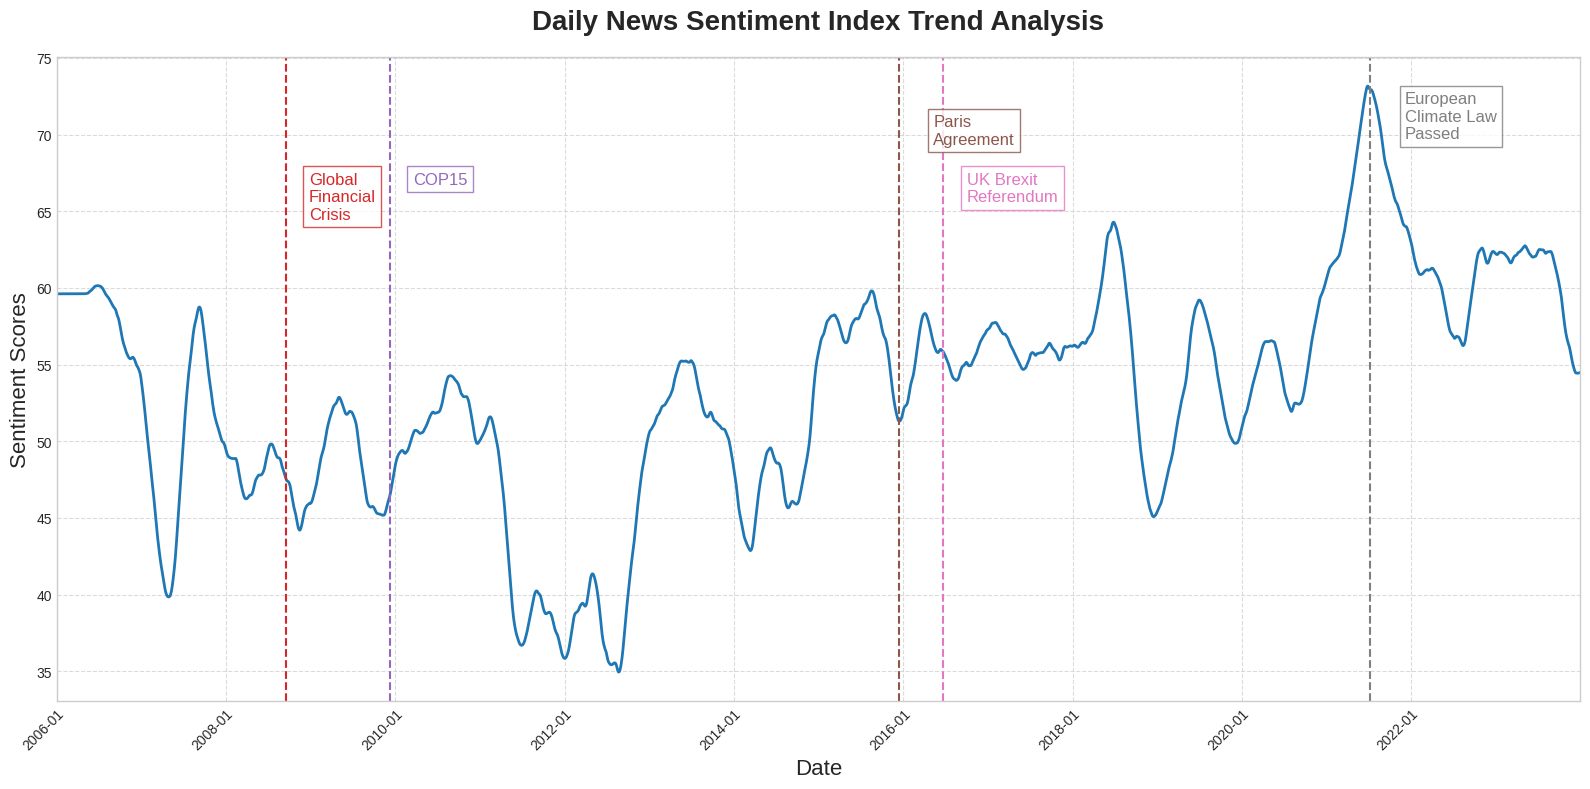

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Read CSV file
file_path = "/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/EWMA_Daily Scores_120.csv"
data = pd.read_csv(file_path)

# Ensure the Date column is of datetime type for plotting
data['Date'] = pd.to_datetime(data['Date'])

# Set font to a more universally available font
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

# Set plot size and style
plt.figure(figsize=(16, 8))
plt.style.use('seaborn-whitegrid')

# Add subplot
ax = plt.subplot()

# Plot the trend, showing only the Gaussian smoothed data
ax.plot(data['Date'], data['WEMA_Score_2'], linewidth=2, label='Gaussian Smoothed Trend', color='#1f77b4')

# Set title and axis labels
ax.set_title('Daily News Sentiment Index Trend Analysis', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Sentiment Scores', fontsize=16)

# Set x-axis date format
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)

# Show a longer date range, such as 2006-2023
ax.set_xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2023-12-31'))

# Automatically adjust the angle of x-axis date labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Set background grid
ax.grid(linestyle='--', alpha=0.7)

# Add event annotations with vertical text
events = [
    ('2008-09-14', 'Global\nFinancial\nCrisis', '#d62728'),
    ('2009-12-07', 'COP15', '#9467bd'),
    ('2015-12-12', 'Paris\nAgreement', '#8c564b'),
    ('2016-06-23', 'UK Brexit\nReferendum', '#e377c2'),
    ('2021-07-09', 'European\nClimate Law\nPassed', '#7f7f7f')
]

for date, label, color in events:
    event_date = pd.Timestamp(date)
    ax.axvline(x=event_date, color=color, linestyle='--', linewidth=1.5)
    # Adjust the position of the text to avoid overlap
    if label == 'Paris\nAgreement':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.95, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'European\nClimate Law\nPassed':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.97, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    else:
        ax.text(x=event_date + pd.Timedelta(days=100), y=ax.get_ylim()[1]*0.9, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))

plt.tight_layout()
plt.show()

K線圖

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.5 MB/s eta 0:00:00


Calculate OHLC

In [ ]:
import pandas as pd

# 讀取 CSV 檔案
file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/EWMA_Daily Scores_120.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

# 設定日期為索引
data.set_index('Date', inplace=True)

# 按月重採樣並計算 OHLC 值
ohlc_data = data['WEMA_Score_3'].resample('M').ohlc()

# 保存為 CSV 檔案
ohlc_file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/ohlc_EWMA120_scores.csv'
ohlc_data.to_csv(ohlc_file_path)

# 確認文件保存路徑
print(f"OHLC data has been saved to: {ohlc_file_path}")

OHLC data has been saved to: /content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/ohlc_EWMA120_scores.csv


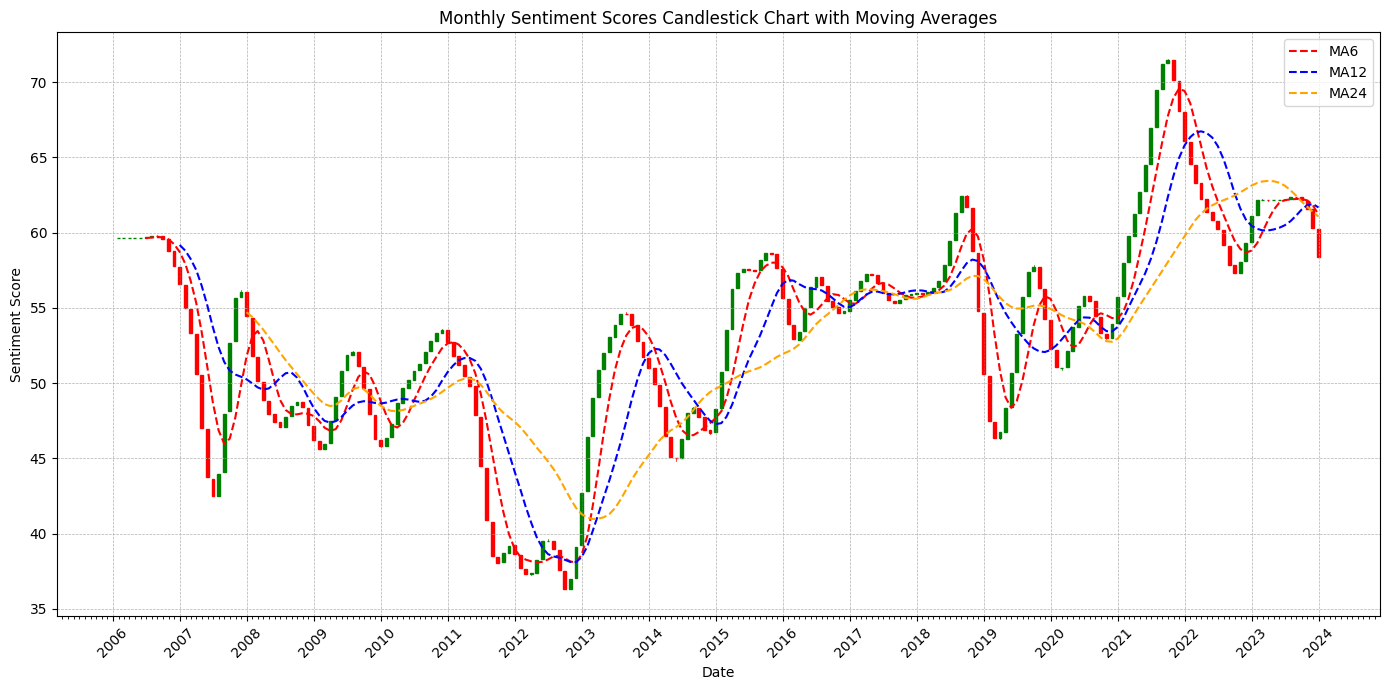

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as ticker

# 讀取 OHLC CSV 檔案
ohlc_file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/ohlc_EWMA120_scores.csv'
ohlc_data = pd.read_csv(ohlc_file_path, index_col='Date', parse_dates=True)

# 重設索引以便於繪圖
ohlc_data.reset_index(inplace=True)
ohlc_data['Date'] = ohlc_data['Date'].map(mdates.date2num)

# 計算移動平均線
ohlc_data['MA6'] = ohlc_data['close'].rolling(window=6).mean()
ohlc_data['MA12'] = ohlc_data['close'].rolling(window=12).mean()
ohlc_data['MA24'] = ohlc_data['close'].rolling(window=24).mean()

# 繪製月K線圖
fig, ax = plt.subplots(figsize=(14, 7))

# 繪製K線圖
candlestick_ohlc(ax, ohlc_data[['Date', 'open', 'high', 'low', 'close']].values, width=15, colorup='g', colordown='r')

# 繪製移動平均線
ax.plot(ohlc_data['Date'], ohlc_data['MA6'], label='MA6', color='red', linestyle='--')
ax.plot(ohlc_data['Date'], ohlc_data['MA12'], label='MA12', color='blue', linestyle='--')
ax.plot(ohlc_data['Date'], ohlc_data['MA24'], label='MA24', color='orange', linestyle='--')

# 設置標題和標籤
ax.set_title('Monthly Sentiment Scores Candlestick Chart with Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')

# 美化x軸標籤
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 設置網格
ax.grid(True, linestyle='--', linewidth=0.5)

# 顯示圖例
ax.legend()

# 自動調整圖表佈局
plt.xticks(rotation=45)
plt.tight_layout()

# 顯示圖表
plt.show()

## Calculate CMSI

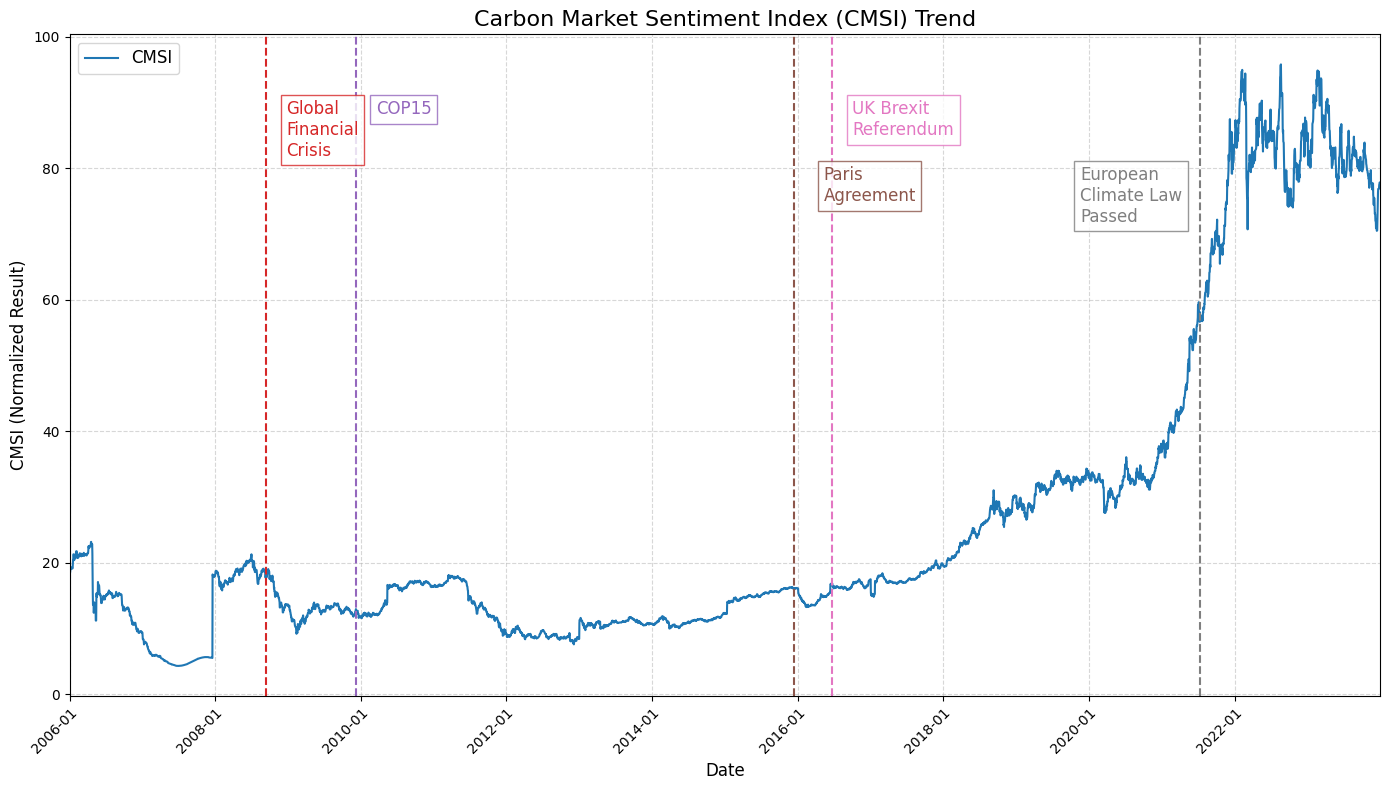

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 讀取CSV文件
data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/2006-2023_Normalization_0-100_CMSI_CMI=0.9, NSI=0.1.csv', parse_dates=['Date'])

# 設置圖表大小
plt.figure(figsize=(14, 8))

# 添加子圖
ax = plt.subplot()

# 繪製折線圖並添加標籤
ax.plot(data['Date'], data['CMSI'], linewidth=1.5, label='CMSI')

# 設置標題和軸標籤
ax.set_title('Carbon Market Sentiment Index (CMSI) Trend', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('CMSI (Normalized Result)', fontsize=12)

# 設置x軸日期格式
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)

# 展示更長的日期範圍,如2006-2023
ax.set_xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2023-12-31'))

# 自動調整x軸日期標籤的角度
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# 設置背景網格
ax.grid(linestyle='--', alpha=0.5)

# 添加事件標註
events = [
    ('2008-09-14', 'Global\nFinancial\nCrisis', '#d62728'),
    ('2009-12-07', 'COP15', '#9467bd'),
    ('2015-12-12', 'Paris\nAgreement', '#8c564b'),
    ('2016-06-23', 'UK Brexit\nReferendum', '#e377c2'),
    ('2021-07-09', 'European\nClimate Law\nPassed', '#7f7f7f')
]

for date, label, color in events:
    event_date = pd.Timestamp(date)
    ax.axvline(x=event_date, color=color, linestyle='--', linewidth=1.5)
    # 根據事件標籤調整文字位置，避免重疊
    if label == 'European\nClimate Law\nPassed':
        ax.text(x=event_date - pd.Timedelta(days=600), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'Paris\nAgreement':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    else:
        ax.text(x=event_date + pd.Timedelta(days=100), y=ax.get_ylim()[1]*0.9, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))

# 添加圖例
ax.legend(fontsize=12, loc='upper left')

# 調整圖表佈局
plt.tight_layout()

# 顯示圖表
plt.show()

## Analysis CMSI

Descriptive Statistics

In [ ]:
import pandas as pd

# 定義檔案路徑
file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/2006-2023_Normalization_0-100_CMSI_CMI=0.9, NSI=0.1.csv'

# 讀取CSV文件
data = pd.read_csv(file_path)

# 計算敘述性統計數據
descriptive_stats = data[['NSI', 'CMI', 'CMSI']].describe().T

# 計算變異係數（CV）
descriptive_stats['CV'] = (descriptive_stats['std'] / descriptive_stats['mean']) * 100

# 重新組織統計數據以匹配表格格式
descriptive_stats = descriptive_stats[['count', 'mean', 'std', 'CV', '50%', 'max', 'min']]
descriptive_stats.columns = ['Obs.', 'Mean', 'SD', 'CV', 'Median', 'Maximum', 'Minimum']

# 轉置敘述性統計數據以匹配所需格式
descriptive_stats_transposed = descriptive_stats.T
descriptive_stats_transposed.columns = ['NSI', 'CMI', 'CMSI']

# 顯示結果
print(descriptive_stats_transposed)

                 NSI          CMI         CMSI
Obs.     6574.000000  6574.000000  6574.000000
Mean       53.243004    23.263902    26.261812
SD          7.064177    25.575374    23.460655
CV         13.267802   109.935876    89.333726
Median     53.975000    12.550000    16.590500
Maximum    71.540000   100.000000    95.827000
Minimum    36.300000     0.000000     4.320000


Lagged CMSI

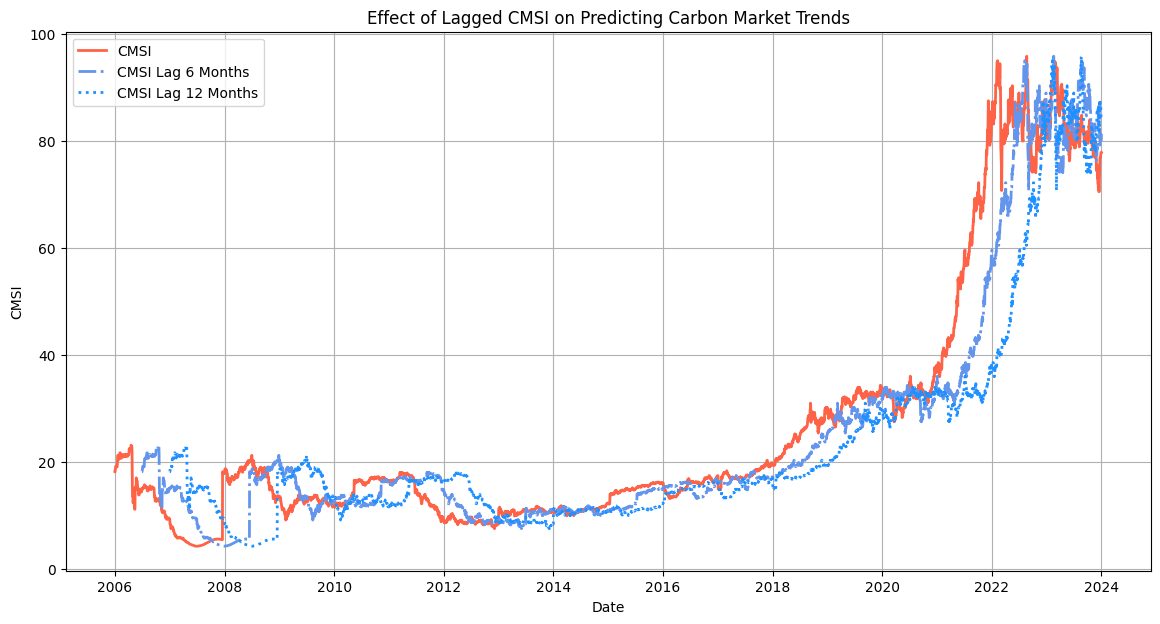

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/2006-2023_Normalization_0-100_CMSI_CMI=0.9, NSI=0.1.csv'
data = pd.read_csv(file_path)

# 将Date列转换为datetime格式
data['Date'] = pd.to_datetime(data['Date'])

# 按日期排序以确保滞后计算的正确性
data = data.sort_values(by='Date')

# 添加滞后列：6个月和12个月的滞后值
data['CMSI_lag_6m'] = data['CMSI'].shift(180)  # 6 months lag
data['CMSI_lag_12m'] = data['CMSI'].shift(365) # 12 months lag

# 绘制整体时间序列图
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['CMSI'], label='CMSI', color='tomato', linewidth=2.0)
plt.plot(data['Date'], data['CMSI_lag_6m'], label='CMSI Lag 6 Months', color='cornflowerblue', linestyle='-.', linewidth=2.0)
plt.plot(data['Date'], data['CMSI_lag_12m'], label='CMSI Lag 12 Months', color='dodgerblue', linestyle=':', linewidth=2.0)
plt.title('Effect of Lagged CMSI on Predicting Carbon Market Trends')
plt.xlabel('Date')
plt.ylabel('CMSI')
plt.legend()
plt.grid(True)
plt.show()

Global Financial Crisis

<Figure size 640x480 with 0 Axes>

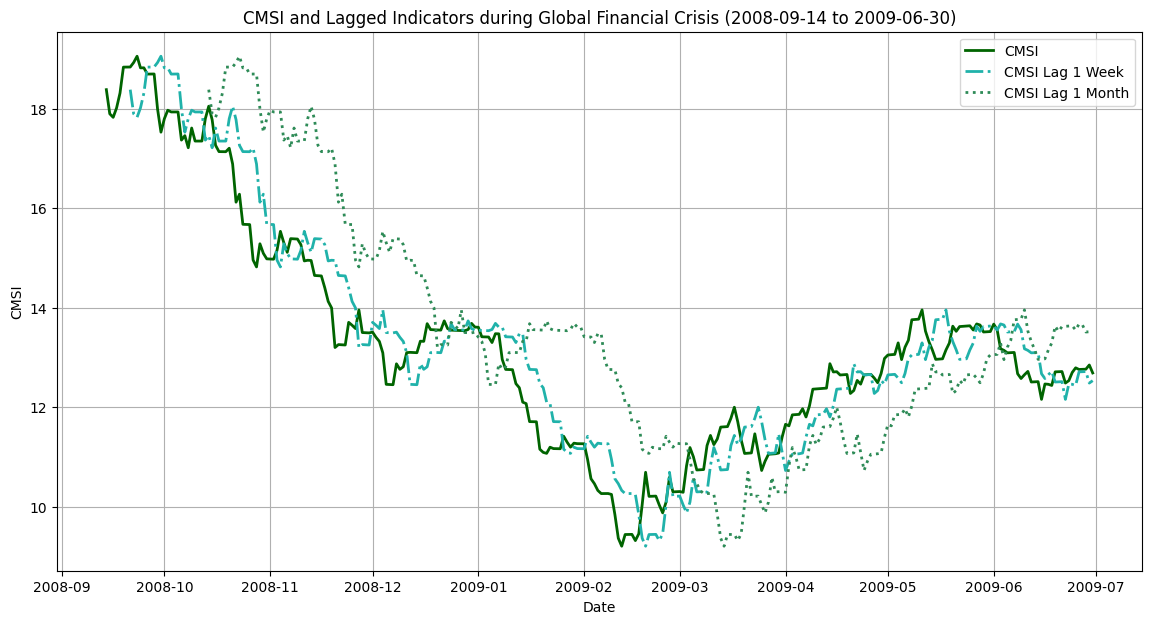

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/2006-2023_Normalization_0-100_CMSI_CMI=0.9, NSI=0.1.csv'
data = pd.read_csv(file_path)

# 将Date列转换为datetime格式
data['Date'] = pd.to_datetime(data['Date'])

# 按日期排序以确保滞后计算的正确性
data = data.sort_values(by='Date')

# 选择全球金融危机期间的数据
gfc_data = data[(data['Date'] >= '2008-09-14') & (data['Date'] <= '2009-06-30')].copy()

# 添加滞后列：1个星期和1个月的滞后值
gfc_data.loc[:, 'CMSI_lag_1w'] = gfc_data['CMSI'].shift(7)   # 1 week lag
gfc_data.loc[:, 'CMSI_lag_1m'] = gfc_data['CMSI'].shift(30)  # 1 month lag

# 绘制时间序列图
plt.figure(figsize=(14, 7))
plt.plot(gfc_data['Date'], gfc_data['CMSI'], label='CMSI', color='darkgreen', linewidth=2.0)
plt.plot(gfc_data['Date'], gfc_data['CMSI_lag_1w'], label='CMSI Lag 1 Week', color='lightseagreen', linestyle='-.', linewidth=2.0)
plt.plot(gfc_data['Date'], gfc_data['CMSI_lag_1m'], label='CMSI Lag 1 Month', color='seagreen', linestyle=':', linewidth=2.0)
plt.title('CMSI and Lagged Indicators during Global Financial Crisis (2008-09-14 to 2009-06-30)')
plt.xlabel('Date')
plt.ylabel('CMSI')
plt.legend()
plt.grid(True)
plt.show()

European Climate Law Passed

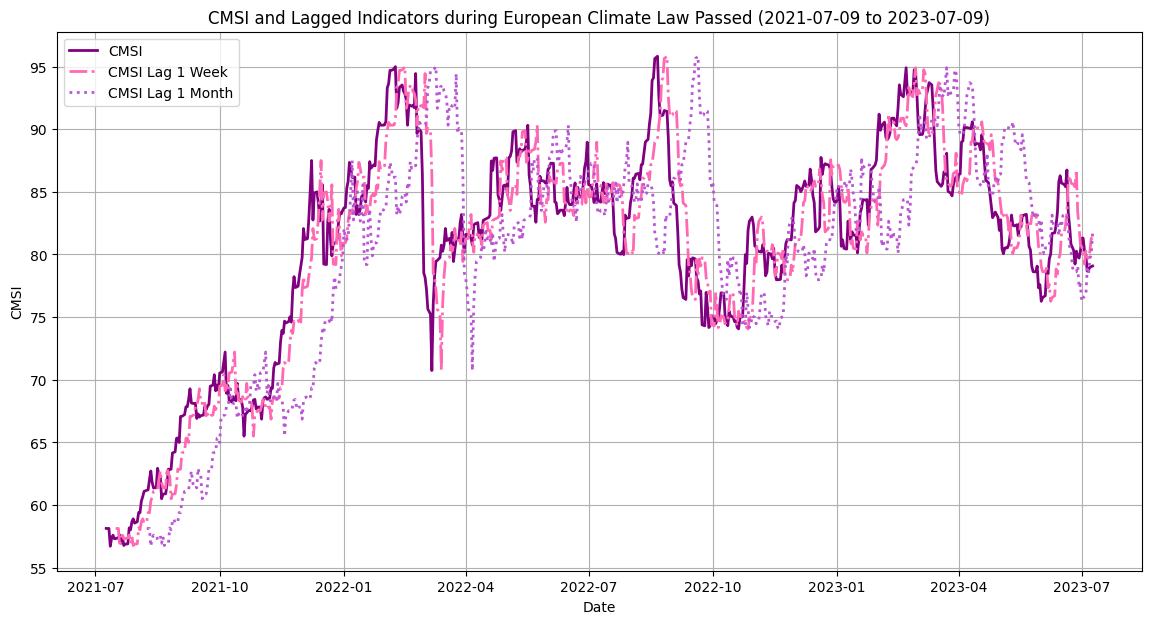

In [ ]:
# 选择欧洲气候法案通过期间的数据
ecl_data = data[(data['Date'] >= '2021-07-09') & (data['Date'] <= '2023-07-09')].copy()

# 添加滞后列：1个星期和1个月的滞后值
ecl_data.loc[:, 'CMSI_lag_1w'] = ecl_data['CMSI'].shift(7)   # 1 week lag
ecl_data.loc[:, 'CMSI_lag_1m'] = ecl_data['CMSI'].shift(30)  # 1 month lag

# 绘制时间序列图
plt.figure(figsize=(14, 7))
plt.plot(ecl_data['Date'], ecl_data['CMSI'], label='CMSI', color='purple', linewidth=2.0)
plt.plot(ecl_data['Date'], ecl_data['CMSI_lag_1w'], label='CMSI Lag 1 Week', color='hotpink', linestyle='-.', linewidth=2.0)
plt.plot(ecl_data['Date'], ecl_data['CMSI_lag_1m'], label='CMSI Lag 1 Month', color='mediumorchid', linestyle=':', linewidth=2.0)
plt.title('CMSI and Lagged Indicators during European Climate Law Passed (2021-07-09 to 2023-07-09)')
plt.xlabel('Date')
plt.ylabel('CMSI')
plt.legend()
plt.grid(True)
plt.show()

CMI, NSI, CMSI Trend Analysis: No Weighted

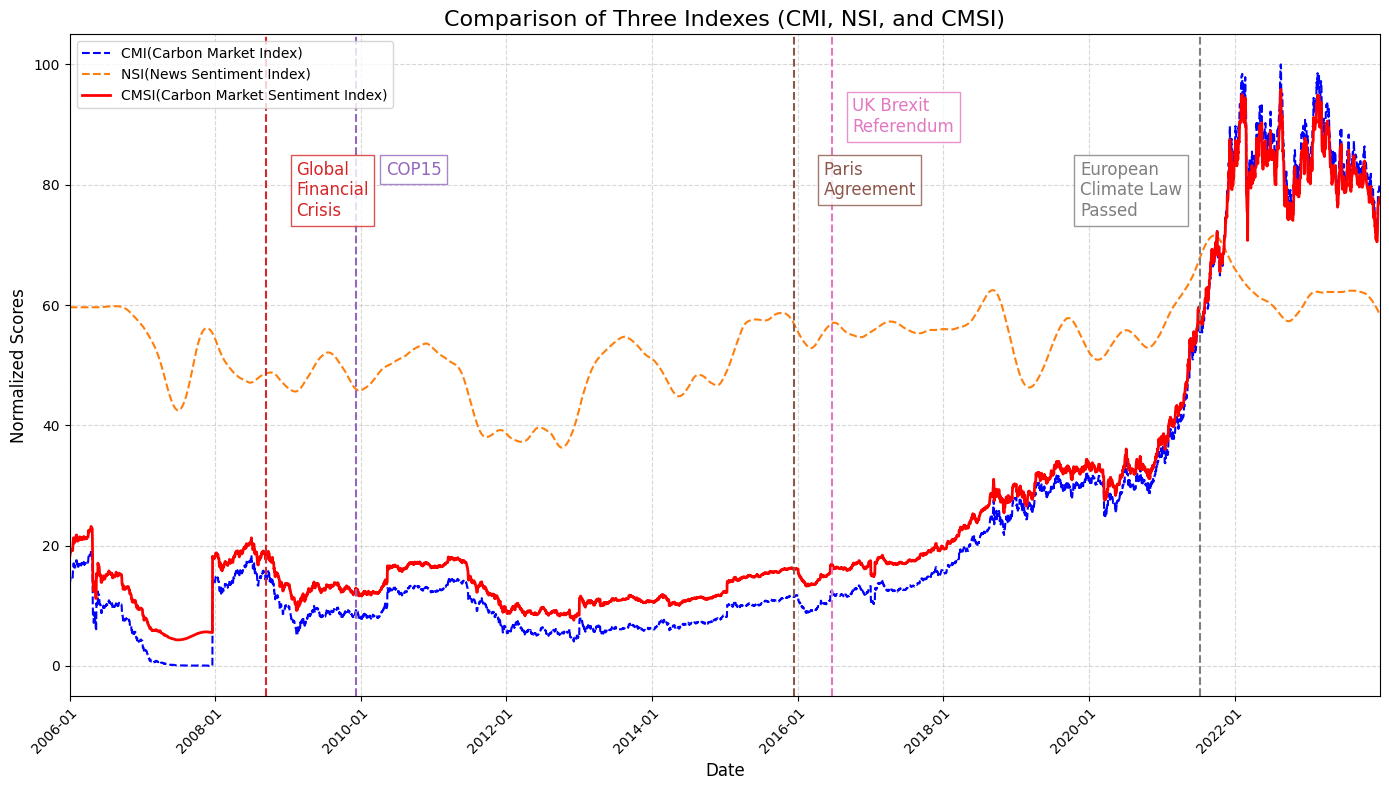

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 讀取CSV資料
data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/2006-2023_Normalization_0-100_CMSI_CMI=0.9, NSI=0.1.csv')

# 將日期轉換為日期格式
data['Date'] = pd.to_datetime(data['Date'])

# 設置圖表大小
plt.figure(figsize=(14, 8))

# 添加子圖
ax = plt.subplot()

# 繪製折線圖並添加標籤
ax.plot(data['Date'], data['CMI'], linestyle='--', color='blue', linewidth=1.5, label='CMI(Carbon Market Index)')
ax.plot(data['Date'], data['NSI'], linestyle='--', color='#ff7f0e', linewidth=1.5, label='NSI(News Sentiment Index)')
ax.plot(data['Date'], data['CMSI'], linestyle='-', color='red', linewidth=2, label='CMSI(Carbon Market Sentiment Index)')

# 設置標題和軸標籤
ax.set_title('Comparison of Three Indexes (CMI, NSI, and CMSI)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Normalized Scores', fontsize=12)

# 設置x軸日期格式
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)

# 設置日期範圍
ax.set_xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2023-12-31'))

# 自動調整x軸日期標籤的角度
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# 設置背景網格
ax.grid(linestyle='--', alpha=0.5)

# 添加事件標註
events = [
    ('2008-09-14', 'Global\nFinancial\nCrisis', '#d62728'),
    ('2009-12-07', 'COP15', '#9467bd'),
    ('2015-12-12', 'Paris\nAgreement', '#8c564b'),
    ('2016-06-23', 'UK Brexit\nReferendum', '#e377c2'),
    ('2021-07-09', 'European\nClimate Law\nPassed', '#7f7f7f')
]

for date, label, color in events:
    event_date = pd.Timestamp(date)
    ax.axvline(x=event_date, color=color, linestyle='--', linewidth=1.5)
    if label == 'European\nClimate Law\nPassed':
        ax.text(x=event_date - pd.Timedelta(days=600), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'Paris\nAgreement':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'Global\nFinancial\nCrisis':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'COP15':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    else:
        ax.text(x=event_date + pd.Timedelta(days=100), y=ax.get_ylim()[1]*0.9, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))

# 設置圖例位置和字體大小
ax.legend(loc='upper left', fontsize=10)

# 調整圖表佈局
plt.tight_layout()

# 顯示圖表
plt.show()

CMI, NSI, CMSI Trend Analysis: After Weighted

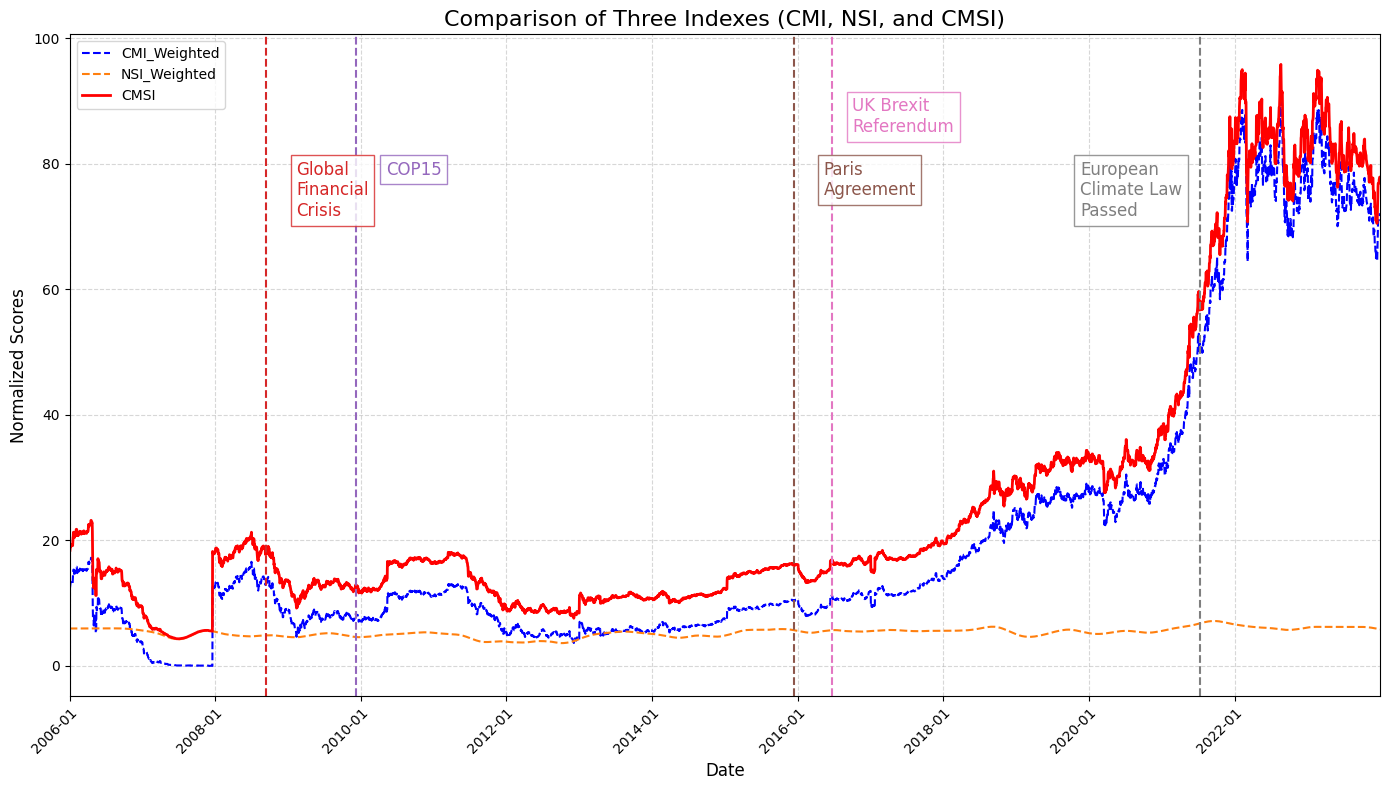

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 讀取CSV資料
data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/2006-2023_Normalization_0-100_CMSI_CMI=0.9, NSI=0.1.csv')

# 將日期轉換為日期格式
data['Date'] = pd.to_datetime(data['Date'])

# 設置圖表大小
plt.figure(figsize=(14, 8))

# 添加子圖
ax = plt.subplot()

# 繪製折線圖並添加標籤
ax.plot(data['Date'], data['CMI_Weighted'], linestyle='--', color='blue', linewidth=1.5, label='CMI_Weighted')
ax.plot(data['Date'], data['NSI_Weighted'], linestyle='--', color='#ff7f0e', linewidth=1.5, label='NSI_Weighted')
ax.plot(data['Date'], data['CMSI'], linestyle='-', color='red', linewidth=2, label='CMSI')

# 設置標題和軸標籤
ax.set_title('Comparison of Three Indexes (CMI, NSI, and CMSI)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Normalized Scores', fontsize=12)

# 設置x軸日期格式
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)

# 設置日期範圍
ax.set_xlim(pd.Timestamp('2006-01-01'), pd.Timestamp('2023-12-31'))

# 自動調整x軸日期標籤的角度
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# 設置背景網格
ax.grid(linestyle='--', alpha=0.5)

# 添加事件標註
events = [
    ('2008-09-14', 'Global\nFinancial\nCrisis', '#d62728'),
    ('2009-12-07', 'COP15', '#9467bd'),
    ('2015-12-12', 'Paris\nAgreement', '#8c564b'),
    ('2016-06-23', 'UK Brexit\nReferendum', '#e377c2'),
    ('2021-07-09', 'European\nClimate Law\nPassed', '#7f7f7f')
]

for date, label, color in events:
    event_date = pd.Timestamp(date)
    ax.axvline(x=event_date, color=color, linestyle='--', linewidth=1.5)
    if label == 'European\nClimate Law\nPassed':
        ax.text(x=event_date - pd.Timedelta(days=600), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'Paris\nAgreement':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'Global\nFinancial\nCrisis':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    elif label == 'COP15':
        ax.text(x=event_date + pd.Timedelta(days=150), y=ax.get_ylim()[1]*0.8, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    else:
        ax.text(x=event_date + pd.Timedelta(days=100), y=ax.get_ylim()[1]*0.9, s=label, fontsize=12, ha='left', va='top', color=color, bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))

# 設置圖例位置和字體大小
ax.legend(loc='upper left', fontsize=10)

# 調整圖表佈局
plt.tight_layout()

# 顯示圖表
plt.show()

Compare with Energy Market

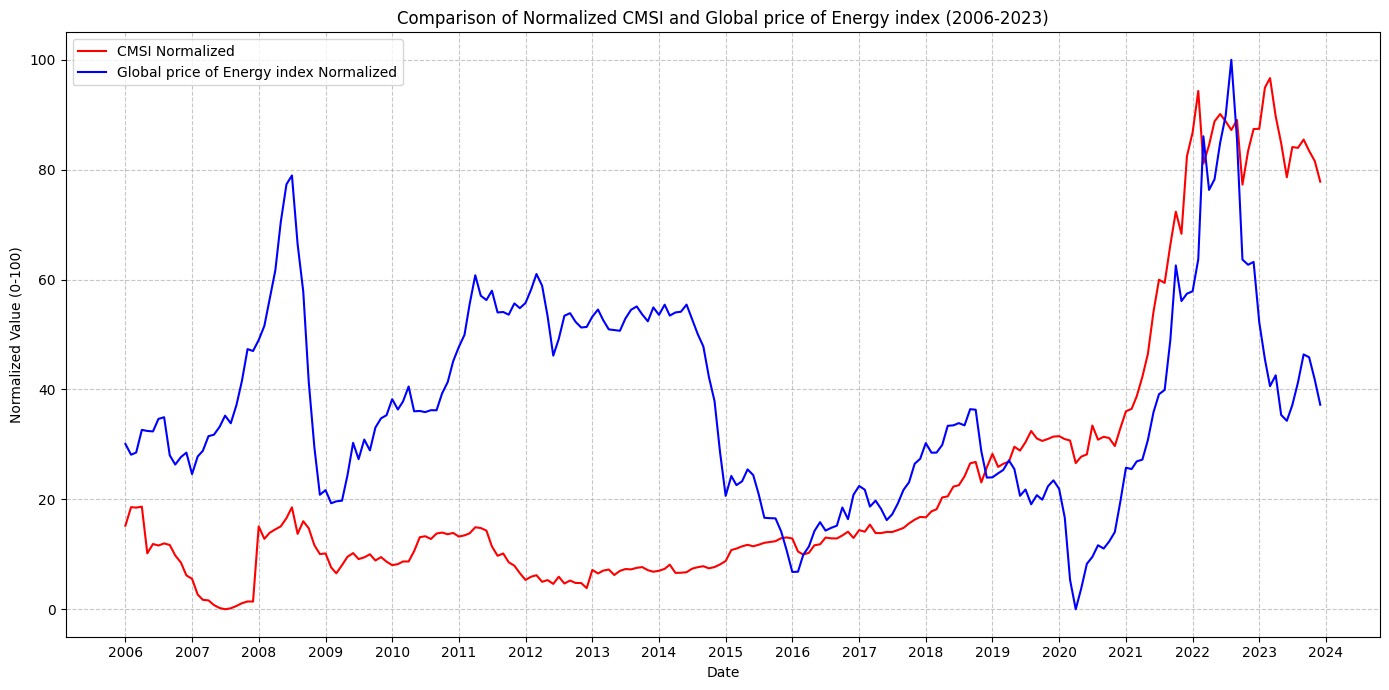

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 檔案路徑
file_path_cmsi = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/2006-2023_Normalization_0-100_CMSI_CMI=0.9, NSI=0.1.csv'
file_path_energy_index = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/Global price of Energy index.csv'

# 讀取數據
df_cmsi = pd.read_csv(file_path_cmsi, parse_dates=['Date'])
df_energy_index = pd.read_csv(file_path_energy_index, parse_dates=['DATE'])

# 設定日期為索引
df_cmsi.set_index('Date', inplace=True)
df_energy_index.set_index('DATE', inplace=True)

# 數據正規化
df_cmsi['CMSI_normalized'] = 100 * (df_cmsi['CMSI'] - df_cmsi['CMSI'].min()) / (df_cmsi['CMSI'].max() - df_cmsi['CMSI'].min())
df_energy_index['PNRGINDEXM_normalized'] = 100 * (df_energy_index['PNRGINDEXM'] - df_energy_index['PNRGINDEXM'].min()) / (df_energy_index['PNRGINDEXM'].max() - df_energy_index['PNRGINDEXM'].min())

# 合併數據框
df_merged = pd.merge(df_cmsi, df_energy_index, left_index=True, right_index=True, how='inner')

# 繪製圖表
plt.figure(figsize=(14, 7))

plt.plot(df_merged.index, df_merged['CMSI_normalized'], label='CMSI Normalized', color='red')
plt.plot(df_merged.index, df_merged['PNRGINDEXM_normalized'], label='Global price of Energy index Normalized', color='blue')

plt.xlabel('Date')
plt.ylabel('Normalized Value (0-100)')
plt.title('Comparison of Normalized CMSI and Global price of Energy index (2006-2023)')
plt.legend()

# 設定x軸日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# 添加網格線
plt.grid(True, linestyle='--', alpha=0.7)

# 調整佈局並顯示圖表
plt.tight_layout()
plt.show()

# 保存合併後的數據框到新的CSV檔案
output_file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/merged_CMSI_Energy_Index.csv'
df_merged.to_csv(output_file_path)

## Setting alpha

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# 讀取數據
data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CMSI_v2_testing/CMSI_computation_vFinal.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 劃分樣本內和樣本外數據
in_sample = data['2006-01-01':'2021-12-31']
out_sample = data['2022-01-01':'2023-12-31']

NSI = in_sample['NSI']
CMI = in_sample['CMI']

# 初始化結果存儲
results = []

# 定義CMSI公式
def calculate_CMSI(alpha, NSI, CMI):
    return alpha * NSI + (1 - alpha) * CMI

# 參數掃描和交叉驗證
alphas = np.linspace(0.1, 0.9, 9)  # 從0.1到0.9，步長為0.1
kf = KFold(n_splits=5)

fold_results = []  # 儲存每個fold的結果

for alpha in alphas:
    fold_volatility = []
    for fold, (train_index, val_index) in enumerate(kf.split(in_sample), 1):
        train, val = in_sample.iloc[train_index], in_sample.iloc[val_index]
        train_NSI, val_NSI = train['NSI'], val['NSI']
        train_CMI, val_CMI = train['CMI'], val['CMI']

        train_CMSI = calculate_CMSI(alpha, train_NSI, train_CMI)
        val_CMSI = calculate_CMSI(alpha, val_NSI, val_CMI)

        # 使用CMSI的標準差作為波動性指標
        volatility = np.std(val_CMSI)
        fold_volatility.append(volatility)
        fold_results.append({'alpha': alpha, 'fold': fold, 'volatility': volatility})

    avg_volatility = np.mean(fold_volatility)
    results.append({'alpha': alpha, 'volatility': avg_volatility})

# 找到波動性最小的alpha值
best_alpha = min(results, key=lambda x: x['volatility'])['alpha']

# 使用最佳alpha值進行最終訓練和驗證
final_CMSI_in_sample = calculate_CMSI(best_alpha, in_sample['NSI'], in_sample['CMI'])
final_CMSI_out_sample = calculate_CMSI(best_alpha, out_sample['NSI'], out_sample['CMI'])

# 計算最終模型的波動性
final_volatility_in_sample = np.std(final_CMSI_in_sample)
final_volatility_out_sample = np.std(final_CMSI_out_sample)

# 創建DataFrame顯示每個fold的結果
df_fold_results = pd.DataFrame(fold_results)

# 將fold結果保存為CSV
df_fold_results.to_csv('/content/drive/MyDrive/Thesis Dataset/CMSI_v2_testing/fold-cross/Fold_Results.csv', index=False)

# 總結結果並保存
summary_results = {
    'Best Alpha': best_alpha,
    'Final In-Sample Volatility': final_volatility_in_sample,
    'Final Out-Sample Volatility': final_volatility_out_sample
}
summary_df = pd.DataFrame([summary_results])
summary_df.to_csv('/content/drive/MyDrive/Thesis Dataset/CMSI_v2_testing/fold-cross/Summary_Results.csv', index=False)

# 顯示結果
print(df_fold_results)
print(summary_results)

    alpha  fold  volatility
0     0.1     1    5.697562
1     0.1     2    2.643795
2     0.1     3    1.808699
3     0.1     4    3.836624
4     0.1     5   13.931163
5     0.2     1    5.218168
6     0.2     2    2.743768
7     0.2     3    2.064188
8     0.2     4    3.548562
9     0.2     5   12.938519
10    0.3     1    4.795877
11    0.3     2    2.880907
12    0.3     3    2.364938
13    0.3     4    3.265850
14    0.3     5   11.953690
15    0.4     1    4.446986
16    0.4     2    3.050203
17    0.4     3    2.695843
18    0.4     4    2.990008
19    0.4     5   10.978781
20    0.5     1    4.189871
21    0.5     2    3.246629
22    0.5     3    3.047096
23    0.5     4    2.723123
24    0.5     5   10.016689
25    0.6     1    4.042085
26    0.6     2    3.465576
27    0.6     3    3.412418
28    0.6     4    2.468103
29    0.6     5    9.071491
30    0.7     1    4.015716
31    0.7     2    3.703051
32    0.7     3    3.787741
33    0.7     4    2.229024
34    0.7     5    8

Optimal α: 0.10
Out-of-sample performance: MSE=6.2276, MAE=2.4404
    alpha          MSE        MAE
0    0.10    13.500106   3.537909
1    0.11    16.335129   3.891700
2    0.12    19.440153   4.245491
3    0.13    22.815180   4.599282
4    0.14    26.460208   4.953073
..    ...          ...        ...
76   0.86   998.467858  30.426019
77   0.87  1021.823042  30.779810
78   0.88  1045.448228  31.133601
79   0.89  1069.343416  31.487392
80   0.90  1093.508606  31.841183

[81 rows x 3 columns]


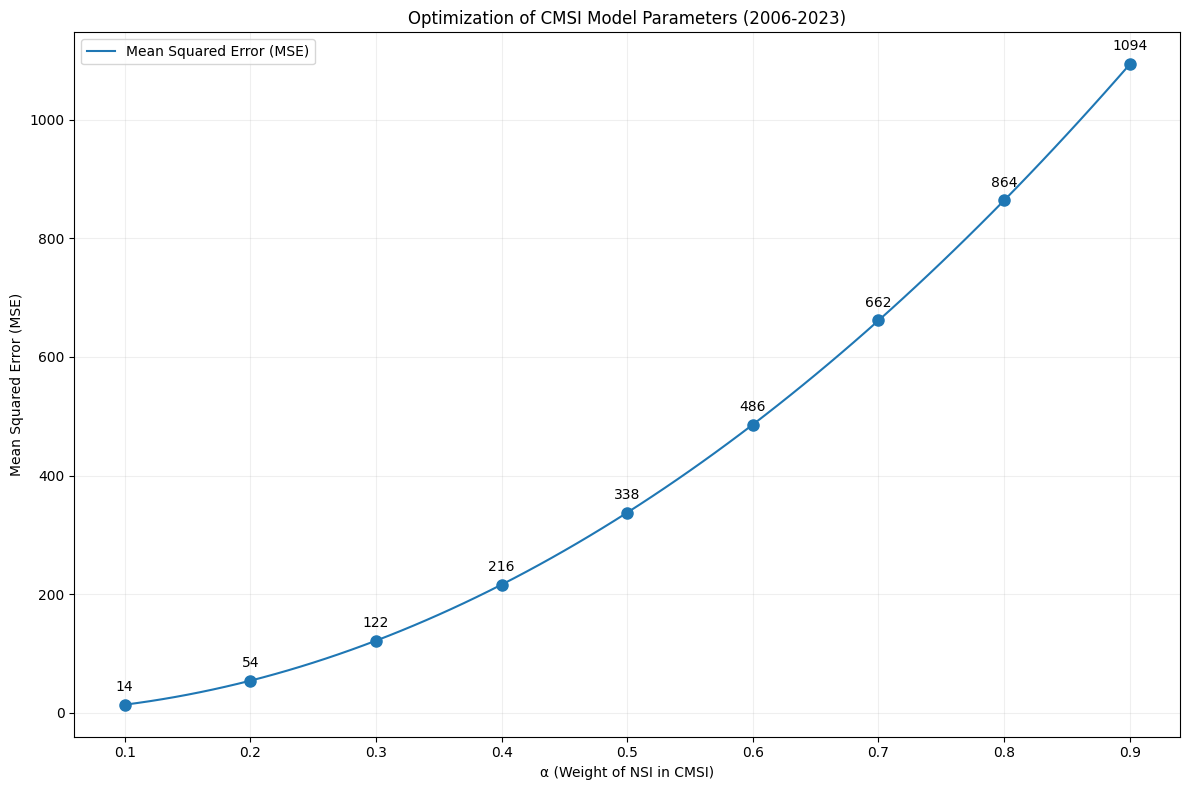

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 讀取數據
file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/2006-2023_Normalization_0-100_CMSI.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 劃分樣本內和樣本外數據
in_sample = data['2006-01-01':'2021-12-31']
out_sample = data['2022-01-01':'2023-12-31']

# 定義CMSI計算公式
def calculate_CMSI(alpha, NSI, CMI):
    return alpha * NSI + (1 - alpha) * CMI

# 定義評估函數
def evaluate_performance(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    return mse, mae

# 初始化結果存儲
results = []

# 參數掃描和交叉驗證
alphas = np.linspace(0.1, 0.9, 81)  # 從0.1到0.9，步長為0.01
tscv = TimeSeriesSplit(n_splits=5)

for alpha in alphas:
    mse_list, mae_list = [], []
    for train_index, val_index in tscv.split(in_sample):
        train, val = in_sample.iloc[train_index], in_sample.iloc[val_index]

        # 計算訓練集和驗證集的CMSI
        train_CMSI = calculate_CMSI(alpha, train['NSI'], train['CMI'])
        val_CMSI = calculate_CMSI(alpha, val['NSI'], val['CMI'])

        # 評估性能
        mse, mae = evaluate_performance(val['CMI'], val_CMSI)
        mse_list.append(mse)
        mae_list.append(mae)

    avg_mse = np.mean(mse_list)
    avg_mae = np.mean(mae_list)
    results.append({'alpha': alpha, 'MSE': avg_mse, 'MAE': avg_mae})

# 轉換結果為DataFrame
results_df = pd.DataFrame(results)

# 找到性能最好的alpha值（這裡以MSE最小為標準）
best_alpha = results_df.loc[results_df['MSE'].idxmin(), 'alpha']

# 使用最佳alpha值進行最終計算
final_CMSI_in_sample = calculate_CMSI(best_alpha, in_sample['NSI'], in_sample['CMI'])
final_CMSI_out_sample = calculate_CMSI(best_alpha, out_sample['NSI'], out_sample['CMI'])

# 評估樣本外性能
out_sample_mse, out_sample_mae = evaluate_performance(out_sample['CMI'], final_CMSI_out_sample)
print(f"Optimal α: {best_alpha:.2f}")
print(f"Out-of-sample performance: MSE={out_sample_mse:.4f}, MAE={out_sample_mae:.4f}")
print(results_df)

# 視覺化結果
plt.figure(figsize=(12, 8))
plt.plot(results_df['alpha'], results_df['MSE'], label='Mean Squared Error (MSE)', color='#1f77b4')

# 標記特定點並添加標籤
for alpha in np.arange(0.1, 1.0, 0.1):
    idx = results_df['alpha'].sub(alpha).abs().idxmin()
    x = results_df.loc[idx, 'alpha']
    y = results_df.loc[idx, 'MSE']
    plt.plot(x, y, 'o', color='#1f77b4', markersize=8)
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('α (Weight of NSI in CMSI)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Optimization of CMSI Model Parameters (2006-2023)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

# 保存結果
results_df.to_csv('/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/Alpha_Results.csv', index=False)

## Comparative Sentiment Annotation Performance

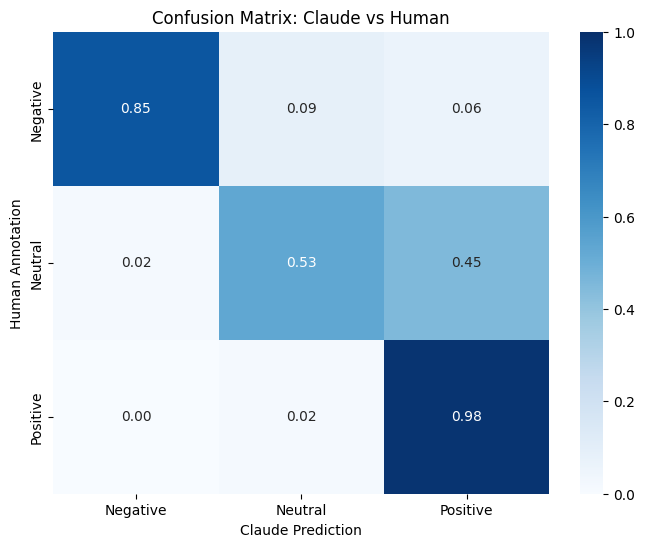

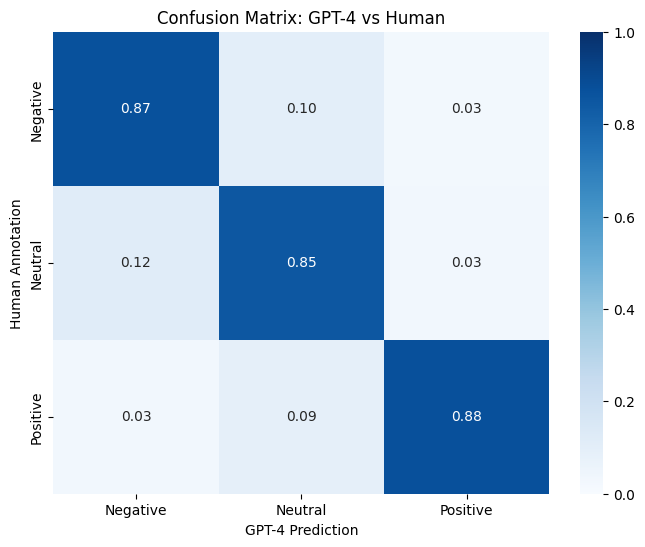

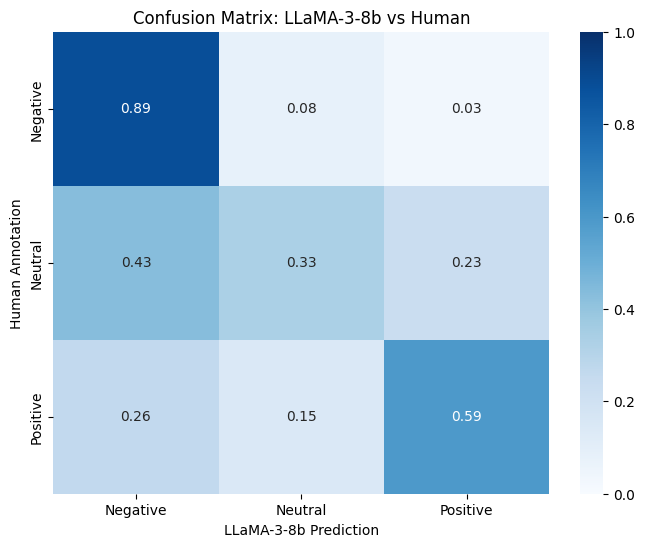

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取 CSV 檔案
file_path = '/content/drive/MyDrive/Thesis Dataset/CMSI_vFinal_testing/updated_human_annotation_data.csv'  # 請替換成您的 CSV 檔案路徑
data = pd.read_csv(file_path)

def plot_confusion_matrix(df, model_col, human_col, model_name):
    # 使用 pd.crosstab 計算混淆矩陣，並正規化每一行
    conf_matrix = pd.crosstab(df[human_col], df[model_col], normalize='index')
    # 設定圖形的大小
    plt.figure(figsize=(8, 6))
    # 繪製熱點圖，顯示數值，保留兩位小數，選擇顏色主題
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', vmin=0, vmax=1)
    # 設定圖表標題
    plt.title(f'Confusion Matrix: {model_name} vs Human')
    # 設定y軸標籤
    plt.ylabel('Human Annotation')
    # 設定x軸標籤
    plt.xlabel(f'{model_name} Prediction')
    # 顯示圖形
    plt.show()

# 繪製三個模型的混淆矩陣
plot_confusion_matrix(data, 'claude_tendency', 'Human Annotation', 'Claude')
plot_confusion_matrix(data, 'gpt4o_tendency', 'Human Annotation', 'GPT-4')
plot_confusion_matrix(data, 'llama3_tendency', 'Human Annotation', 'LLaMA-3-8b')

<ipython-input-78-65a8673f5195>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names, fontsize=12)  # 增加x轴标签的字体大小


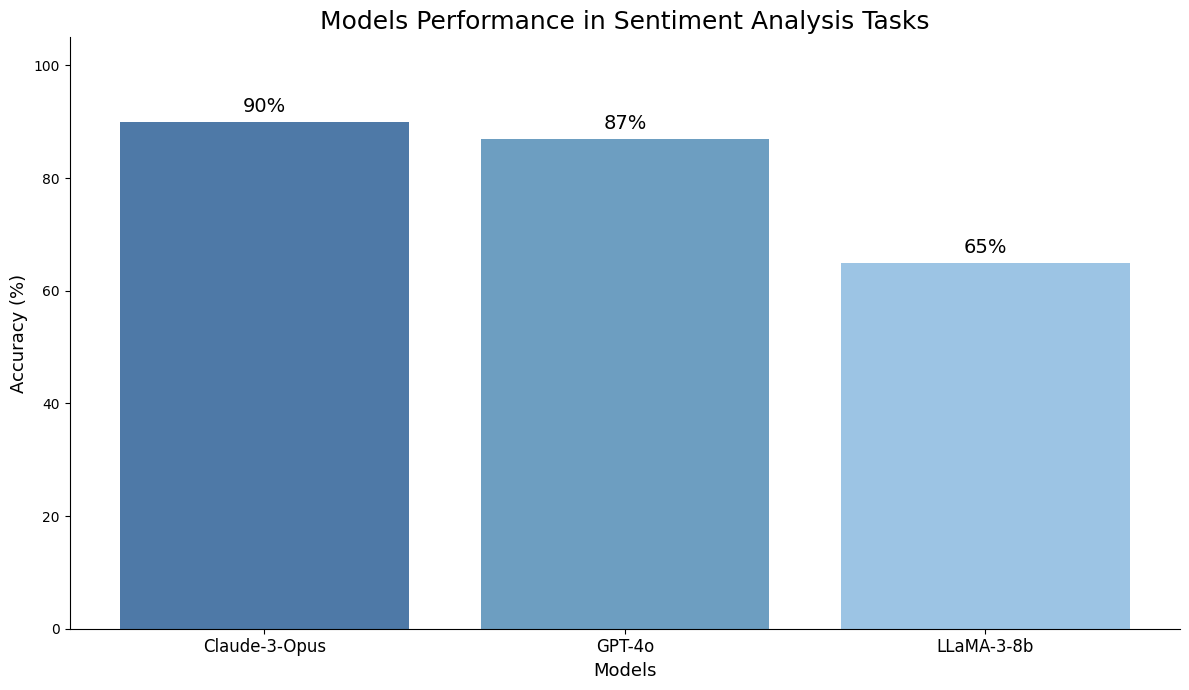

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 模型的名字
model_names = ['Claude-3-Opus', 'GPT-4o', 'LLaMA-3-8b']

# 各模型的准确率数据
accuracies = [90, 87, 65]

# 创建一个条形图
fig, ax = plt.subplots(figsize=(12, 7))  # 增加图形大小
colors = ['#4e79a7', '#6d9ec1', '#9cc4e4']  # 使用蓝色的不同深浅
bars = ax.bar(model_names, accuracies, color=colors)

# 添加数值标签，增加字体大小，并将位置调高
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%',
            ha='center', va='bottom', fontsize=14)
# 设置标题和标签
ax.set_title('Models Performance in Sentiment Analysis Tasks', fontsize=18)
ax.set_xlabel('Models', fontsize=13)  # 增大模型名字的字体大小
ax.set_ylabel('Accuracy (%)', fontsize=13)  # 统一标签的字体大小

# 设置Y轴范围从0到100，并略微增加上限以容纳标签
ax.set_ylim(0, 105)

# 移除顶部和右侧边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 设置x轴标签的字体大小
ax.set_xticklabels(model_names, fontsize=12)  # 增加x轴标签的字体大小

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()